## EDA


In [1]:
!pip install klib

In [2]:
!pip install pandas_profiling

In [3]:
!pip install sweetviz

In [4]:
import pandas as pd
import numpy as np
import klib
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from platform import python_version

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2f}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=4, linewidth=120, suppress=True, edgeitems=5)

sns.set_style("white")

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
#print(pp.__name__, pp.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

C:\Users\vanam\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


python 3.10.9
numpy 1.23.5
pandas 2.2.2
klib 1.1.2
sklearn 1.3.2
sweetviz 2.3.1


# Read Data

In [6]:
file_crash_df = r'C:\Users\vanam\Downloads\crash_df.csv'

crash_df = pd.read_csv(file_crash_df)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814109 entries, 0 to 814108
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               814109 non-null  int64  
 1   crash_date               814109 non-null  object 
 2   crash_year               814109 non-null  int64  
 3   crash_month              814109 non-null  int64  
 4   crash_day_of_week        814109 non-null  int64  
 5   crash_hour               814109 non-null  int64  
 6   crash_time_of_day        814109 non-null  object 
 7   latitude                 814109 non-null  float64
 8   longitude                814109 non-null  float64
 9   beat_of_occurrence       814109 non-null  int64  
 10  address                  814109 non-null  object 
 11  street_no                814109 non-null  int64  
 12  street_direction         814108 non-null  object 
 13  street_name              814109 non-null  object 
 14  post

In [7]:
[*crash_df.columns]

['Unnamed: 0',
 'crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'street_no',
 'street_direction',
 'street_name',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [8]:
features_names = [
    'crash_date',
    'crash_year',
    'crash_month',
    'crash_day_of_week',
    'crash_hour',
    'crash_time_of_day', # New
    'latitude',
    'longitude',
    'beat_of_occurrence',
    'address',
#    'street_no',
#    'street_direction',
#    'street_name',
    'posted_speed_limit',
    'traffic_control_device',
    'device_condition',
    'weather_condition',
    'lighting_condition',
    'trafficway_type',
    'alignment',
    'roadway_surface_cond',
    'road_defect',
    'first_crash_type',
    'prim_contributory_cause',
    'sec_contributory_cause',
    'num_units',
#    'intersection_related_i',
#    'not_right_of_way_i',
#    'hit_and_run_i',
]

target_names = [
    'has_injuries',  # New
    'has_fatal',  # New
    'crash_type',
    'damage',
    'injuries_total',
    'injuries_fatal',
#    'injuries_incapacitating',
#    'inj_non_incap',
#    'inj_report_not_evdnt',
#    'injuries_no_indication',
#    'most_severe_injury',
]

all_columns = features_names + target_names
all_columns

['crash_date',
 'crash_year',
 'crash_month',
 'crash_day_of_week',
 'crash_hour',
 'crash_time_of_day',
 'latitude',
 'longitude',
 'beat_of_occurrence',
 'address',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries',
 'has_fatal',
 'crash_type',
 'damage',
 'injuries_total',
 'injuries_fatal']

In [9]:
crash_df.posted_speed_limit.value_counts()

posted_speed_limit
30     601084
35      54363
25      51332
20      33337
15      28598
10      18971
40       7846
0        7469
45       5250
5        4857
55        649
50        224
100        66
60         43
65         15
70          5
Name: count, dtype: int64

In [10]:
crash_df.posted_speed_limit.round(-1).value_counts() # rounding down to nearest 10

posted_speed_limit
30     601084
20     113267
40      67459
10      18971
0       12326
60        707
50        224
100        66
70          5
Name: count, dtype: int64

In [11]:
crash_df.posted_speed_limit.apply(lambda x: (x//10*10) + round(x%10/10)*10).value_counts() # rounding at mid-point to nearest 10

posted_speed_limit
30     655447
20      84669
10      47569
40      13096
0       12326
50        873
100        66
60         58
70          5
Name: count, dtype: int64

In [12]:
crash_df.posted_speed_limit.apply(lambda x: (x//5*5) + round(x%5/5)*5).value_counts() # rounding to nearest 5

posted_speed_limit
30     601084
35      54363
25      51332
20      33337
15      28598
10      18971
40       7846
0        7469
45       5250
5        4857
55        649
50        224
100        66
60         43
65         15
70          5
Name: count, dtype: int64

In [13]:
(lambda x: (x//10*10) + round(x%10/10)*10)(6) # Testing rounding formula

10

In [14]:
crash_df.beat_of_occurrence.nunique()

271

In [15]:
crash_df.groupby(['latitude','longitude']).size().reset_index(name='n')

latitude  longitude   n
0          41.64     -87.54  23
1          41.64     -87.62   4
2          41.64     -87.62   7
3          41.64     -87.62   1
4          41.64     -87.62   5
...          ...        ...  ..
300528     42.02     -87.67   1
300529     42.02     -87.67   2
300530     42.02     -87.67   1
300531     42.02     -87.67   1
300532     42.02     -87.67   9

[300533 rows x 3 columns]

In [16]:
#crash_df.most_severe_injury.value_counts()

In [17]:
crash_df.crash_type.value_counts()

crash_type
NO INJURY / DRIVE AWAY              597036
INJURY AND / OR TOW DUE TO CRASH    217073
Name: count, dtype: int64

In [18]:
crash_df.injuries_total.apply(lambda x: int(x>0)).value_counts()

injuries_total
0    701859
1    112250
Name: count, dtype: int64

In [19]:
crash_df.injuries_fatal.apply(lambda x: int(x>0)).value_counts()

injuries_fatal
0    813213
1       896
Name: count, dtype: int64

In [20]:
crash_df.first_crash_type.value_counts()

first_crash_type
PARKED MOTOR VEHICLE            189632
REAR END                        181963
SIDESWIPE SAME DIRECTION        123621
TURNING                         116630
ANGLE                            88881
FIXED OBJECT                     37730
PEDESTRIAN                       19027
PEDALCYCLIST                     12313
SIDESWIPE OPPOSITE DIRECTION     11507
OTHER OBJECT                      7984
REAR TO FRONT                     7861
HEAD ON                           6962
REAR TO SIDE                      4705
OTHER NONCOLLISION                2541
REAR TO REAR                      1640
ANIMAL                             586
OVERTURNED                         481
TRAIN                               45
Name: count, dtype: int64

In [21]:
crash_df.trafficway_type.value_counts()

trafficway_type
NOT DIVIDED                        354812
DIVIDED - W/MEDIAN (NOT RAISED)    130546
ONE-WAY                            102979
PARKING LOT                         55157
FOUR WAY                            51752
DIVIDED - W/MEDIAN BARRIER          46167
OTHER                               21810
ALLEY                               13531
T-INTERSECTION                      10357
UNKNOWN                              9472
CENTER TURN LANE                     5897
DRIVEWAY                             2635
RAMP                                 2428
UNKNOWN INTERSECTION TYPE            2391
Y-INTERSECTION                       1128
FIVE POINT, OR MORE                  1118
TRAFFIC ROUTE                         927
NOT REPORTED                          579
ROUNDABOUT                            260
L-INTERSECTION                        163
Name: count, dtype: int64

In [22]:
crash_df.prim_contributory_cause.value_counts()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 317047
FAILING TO YIELD RIGHT-OF-WAY                                                        89504
FOLLOWING TOO CLOSELY                                                                79077
NOT APPLICABLE                                                                       43033
IMPROPER OVERTAKING/PASSING                                                          40145
FAILING TO REDUCE SPEED TO AVOID CRASH                                               34447
IMPROPER BACKING                                                                     32007
IMPROPER LANE USAGE                                                                  29002
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  27243
IMPROPER TURNING/NO SIGNAL                                                           27082
DISREGARDING TRAFFIC SIGNALS                                      

In [23]:
crash_df.sec_contributory_cause.value_counts()

sec_contributory_cause
NOT APPLICABLE                                                                      334397
UNABLE TO DETERMINE                                                                 294500
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30419
FAILING TO YIELD RIGHT-OF-WAY                                                        25622
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  24769
FOLLOWING TOO CLOSELY                                                                21458
IMPROPER OVERTAKING/PASSING                                                          12484
IMPROPER LANE USAGE                                                                  11412
WEATHER                                                                               9385
IMPROPER TURNING/NO SIGNAL                                                            8332
IMPROPER BACKING                                                   

In [24]:
crash_df.traffic_control_device.value_counts()

traffic_control_device
NO CONTROLS                 462328
TRAFFIC SIGNAL              225940
STOP SIGN/FLASHER            81092
UNKNOWN                      32810
OTHER                         5370
YIELD                         1192
LANE USE MARKING              1171
OTHER REG. SIGN                887
OTHER WARNING SIGN             644
RAILROAD CROSSING GATE         529
PEDESTRIAN CROSSING SIGN       517
DELINEATORS                    318
FLASHING CONTROL SIGNAL        317
SCHOOL ZONE                    310
POLICE/FLAGMAN                 268
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               159
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: count, dtype: int64

In [25]:
crash_df.injuries_total.describe()

count   814,109.00
mean          0.19
std           0.57
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          21.00
Name: injuries_total, dtype: float64

# Define Weekdays

In [26]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

# Crash Hour Analysis

array([[<Axes: title={'center': '2013'}>, <Axes: title={'center': '2014'}>],
       [<Axes: title={'center': '2015'}>, <Axes: title={'center': '2016'}>],
       [<Axes: title={'center': '2017'}>, <Axes: title={'center': '2018'}>],
       [<Axes: title={'center': '2019'}>, <Axes: title={'center': '2020'}>],
       [<Axes: title={'center': '2021'}>, <Axes: title={'center': '2022'}>],
       [<Axes: title={'center': '2023'}>, <Axes: title={'center': '2024'}>]], dtype=object)

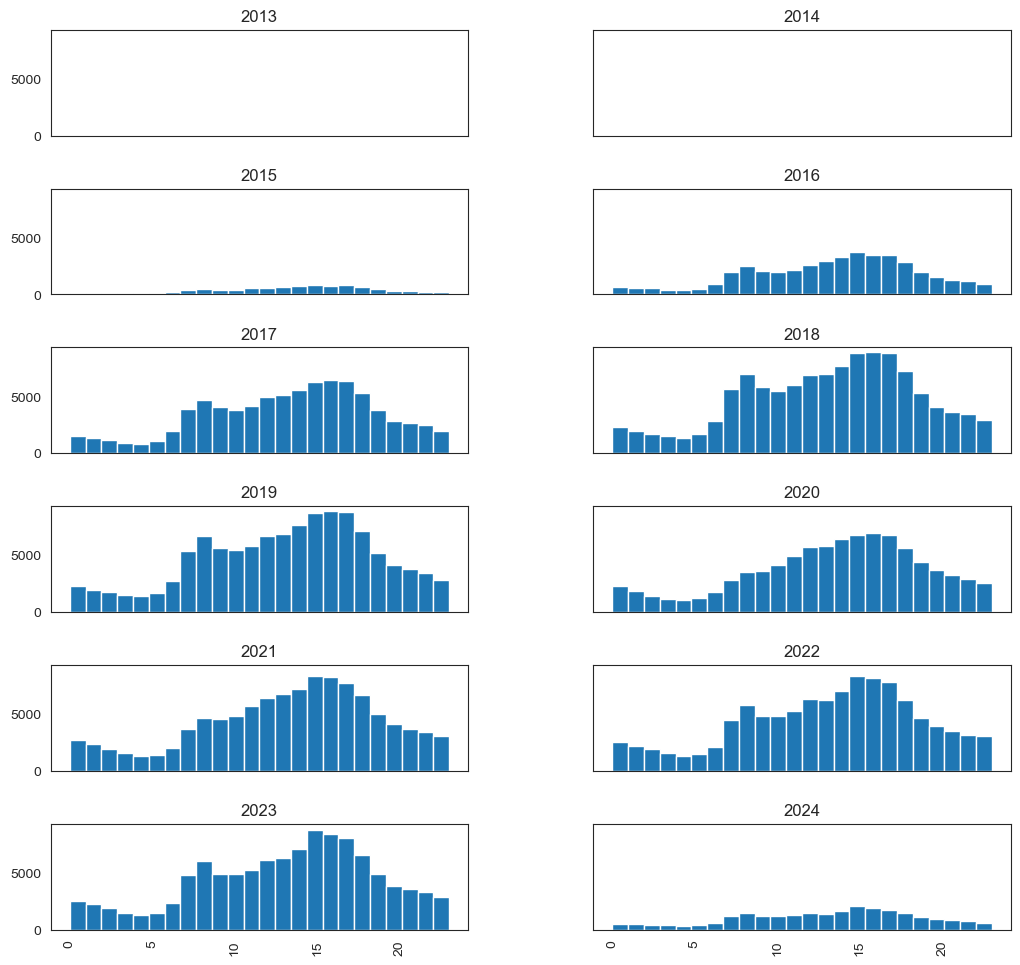

In [27]:
crash_df.hist('crash_hour', bins=24, by='crash_year', layout=(6, 2), figsize=(12, 12), sharey=True, sharex=True)


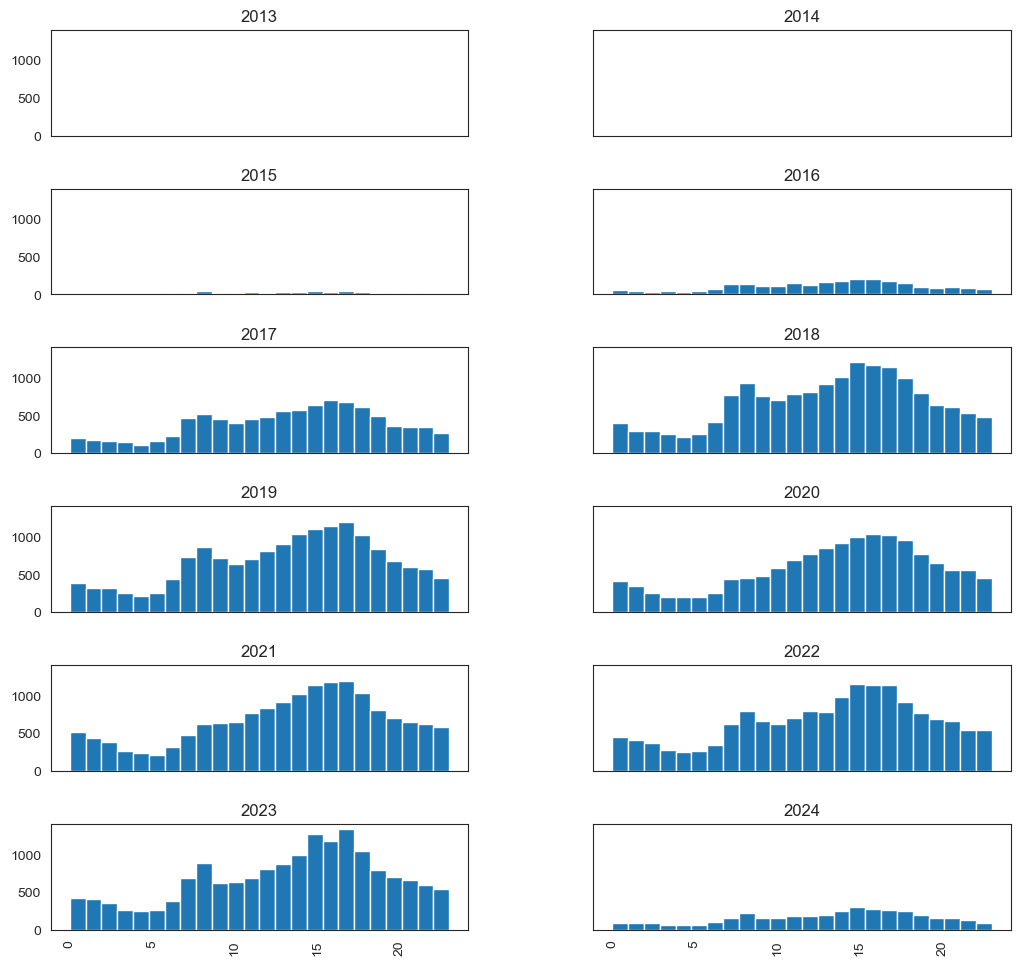

In [28]:
# Crahes that has injuries
crash_df.query('has_injuries == 1').hist('crash_hour',bins=24,by='crash_year',layout=(6,2),figsize=(12,12),sharey=True,sharex=True);

In [29]:
z = pd.cut(crash_df.crash_hour, bins=[-np.inf,6,12,18,np.inf], labels=['overnight','morning','mid_day','evening'])

In [30]:
z

0           mid_day
1           mid_day
2           mid_day
3         overnight
4           morning
            ...    
814104    overnight
814105      mid_day
814106      mid_day
814107    overnight
814108      morning
Name: crash_hour, Length: 814109, dtype: category
Categories (4, object): ['overnight' < 'morning' < 'mid_day' < 'evening']

In [31]:
z.value_counts()

crash_hour
mid_day      339924
morning      241005
evening      138796
overnight     94384
Name: count, dtype: int64

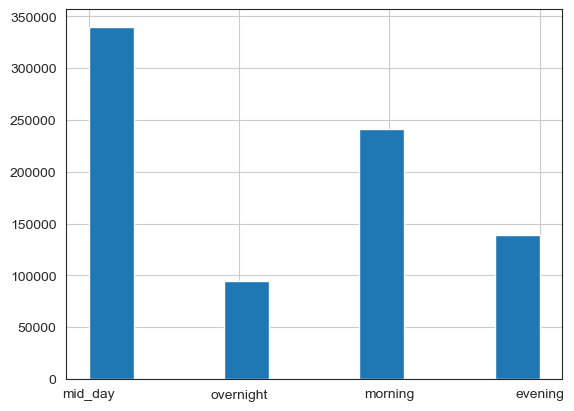

In [32]:
z.hist();

In [33]:
crash_df.crash_hour.isna().sum()

0

In [34]:
z.isna().sum()

0

In [35]:
crash_df.crash_hour.describe()

count   814,109.00
mean         13.20
std           5.56
min           0.00
25%           9.00
50%          14.00
75%          17.00
max          23.00
Name: crash_hour, dtype: float64

# Analaysis

Let's try out some aggreggations

In [36]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
    'crash_hour',
#    'weather_condition'
]).agg({
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()
crash_agg

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3408663750.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({


crash_year  crash_month  crash_hour  injuries_total  injuries_fatal
0           2013            3          16               2               0
1           2013            6          20               1               0
2           2014            1           7               1               0
3           2014            1          18               0               0
4           2014            2          19               0               0
...          ...          ...         ...             ...             ...
2546        2024            4          19              17               0
2547        2024            4          20               5               0
2548        2024            4          21               5               0
2549        2024            4          22               9               0
2550        2024            4          23               0               0

[2551 rows x 5 columns]

In [37]:
crash_agg.pivot_table(index=['crash_month'],columns='crash_year',values=['injuries_total','injuries_fatal'],aggfunc='sum')

injuries_fatal                                                                injuries_total              \
crash_year            2013 2014 2015 2016  2017  2018  2019  2020  2021  2022  2023  2024           2013 2014   2015   
crash_month                                                                                                            
1                      NaN 0.00 0.00 1.00  3.00 11.00 11.00  7.00  9.00 12.00 15.00  4.00            NaN 1.00   0.00   
2                      NaN 0.00 0.00 0.00  5.00  6.00  4.00 10.00  3.00 14.00 15.00  7.00            NaN 0.00   0.00   
3                     0.00  NaN  NaN 1.00  5.00 11.00  9.00  3.00 10.00 11.00 15.00 15.00           2.00  NaN    NaN   
4                      NaN  NaN 0.00 0.00  2.00 11.00  6.00 11.00  6.00 11.00  8.00  1.00            NaN  NaN   0.00   
5                      NaN  NaN 0.00 3.00  6.00  7.00  9.00 12.00 18.00  9.00 11.00   NaN            NaN  NaN   0.00   
6                     0.00 0.00 0.00 0.00  9.00 11.00 11.00 15.00 15.00  8.00 13.00   NaN           1.00 0.00   0.00   
7                      NaN  NaN 0.00 2.00  7.00 21.00  8.00 22.00 14.00 18.00  9.00   NaN            NaN  NaN   0.00   
8                      NaN 0.00 0.00 2.00 11.00 13.00 14.00 11.00 21.00 12.00 10.00   NaN            NaN 0.00  32.00   
9                      NaN  NaN 0.00 0.00 13.00  9.00 11.00 16.00 19.00 15.00 13.00   NaN            NaN  NaN  87.00   
10                     NaN  NaN 1.00 3.00  4.00 13.00  8.00 17.00 13.00 11.00 16.00   NaN            NaN  NaN 179.00   
11                     NaN 0.00 1.00 1.00 13.00  5.00 10.00  6.00 19.00 10.00 10.00   NaN            NaN 0.00 199.00   
12                     NaN  NaN 1.00 1.00  9.00  9.00  5.00 15.00 17.00 18.00 12.00   NaN            NaN  NaN 216.00   

                                                                                            
crash_year    2016     2017     2018     2019     2020     2021     2022     2023     2024  
crash_month                                                                                 
1           202.00   318.00 1,777.00 1,500.00 1,632.00 1,352.00 1,419.00 1,484.00 1,547.00  
2           166.00   342.00 1,287.00 1,404.00 1,650.00 1,112.00 1,371.00 1,456.00 1,662.00  
3           263.00   372.00 1,639.00 1,706.00 1,413.00 1,454.00 1,600.00 1,704.00 1,924.00  
4           240.00   511.00 1,776.00 1,756.00   893.00 1,798.00 1,694.00 1,839.00   239.00  
5           262.00   679.00 2,144.00 2,126.00 1,411.00 2,097.00 2,013.00 2,091.00      NaN  
6           203.00   790.00 2,003.00 2,107.00 1,831.00 2,362.00 2,218.00 2,064.00      NaN  
7           263.00 1,034.00 2,155.00 2,120.00 2,128.00 2,336.00 2,191.00 2,156.00      NaN  
8           369.00 1,438.00 2,034.00 2,116.00 2,106.00 2,067.00 1,912.00 2,123.00      NaN  
9           435.00 1,904.00 1,948.00 1,948.00 1,873.00 2,120.00 2,017.00 2,136.00      NaN  
10          482.00 2,056.00 2,028.00 2,057.00 1,841.00 2,108.00 2,038.00 2,336.00      NaN  
11          398.00 1,802.00 1,732.00 1,830.00 1,475.00 1,735.00 1,762.00 1,935.00      NaN  
12          325.00 1,820.00 1,905.00 1,613.00 1,375.00 1,680.00 1,711.00 1,946.00      NaN

In [38]:
crash_agg.fillna(0)

crash_year  crash_month  crash_hour  injuries_total  injuries_fatal
0           2013            3          16               2               0
1           2013            6          20               1               0
2           2014            1           7               1               0
3           2014            1          18               0               0
4           2014            2          19               0               0
...          ...          ...         ...             ...             ...
2546        2024            4          19              17               0
2547        2024            4          20               5               0
2548        2024            4          21               5               0
2549        2024            4          22               9               0
2550        2024            4          23               0               0

[2551 rows x 5 columns]

In [39]:
crash_agg.pivot_table(index=['crash_month'],columns='crash_year',values=['injuries_total','injuries_fatal'],aggfunc='sum',fill_value=0)

injuries_fatal                                                        injuries_total                       \
crash_year            2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024           2013 2014 2015 2016  2017   
crash_month                                                                                                             
1                        0    0    0    1    3   11   11    7    9   12   15    4              0    1    0  202   318   
2                        0    0    0    0    5    6    4   10    3   14   15    7              0    0    0  166   342   
3                        0    0    0    1    5   11    9    3   10   11   15   15              2    0    0  263   372   
4                        0    0    0    0    2   11    6   11    6   11    8    1              0    0    0  240   511   
5                        0    0    0    3    6    7    9   12   18    9   11    0              0    0    0  262   679   
6                        0    0    0    0    9   11   11   15   15    8   13    0              1    0    0  203   790   
7                        0    0    0    2    7   21    8   22   14   18    9    0              0    0    0  263  1034   
8                        0    0    0    2   11   13   14   11   21   12   10    0              0    0   32  369  1438   
9                        0    0    0    0   13    9   11   16   19   15   13    0              0    0   87  435  1904   
10                       0    0    1    3    4   13    8   17   13   11   16    0              0    0  179  482  2056   
11                       0    0    1    1   13    5   10    6   19   10   10    0              0    0  199  398  1802   
12                       0    0    1    1    9    9    5   15   17   18   12    0              0    0  216  325  1820   

                                                       
crash_year   2018  2019  2020  2021  2022  2023  2024  
crash_month                                            
1            1777  1500  1632  1352  1419  1484  1547  
2            1287  1404  1650  1112  1371  1456  1662  
3            1639  1706  1413  1454  1600  1704  1924  
4            1776  1756   893  1798  1694  1839   239  
5            2144  2126  1411  2097  2013  2091     0  
6            2003  2107  1831  2362  2218  2064     0  
7            2155  2120  2128  2336  2191  2156     0  
8            2034  2116  2106  2067  1912  2123     0  
9            1948  1948  1873  2120  2017  2136     0  
10           2028  2057  1841  2108  2038  2336     0  
11           1732  1830  1475  1735  1762  1935     0  
12           1905  1613  1375  1680  1711  1946     0

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3454253405.py:8: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3454253405.py:8: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

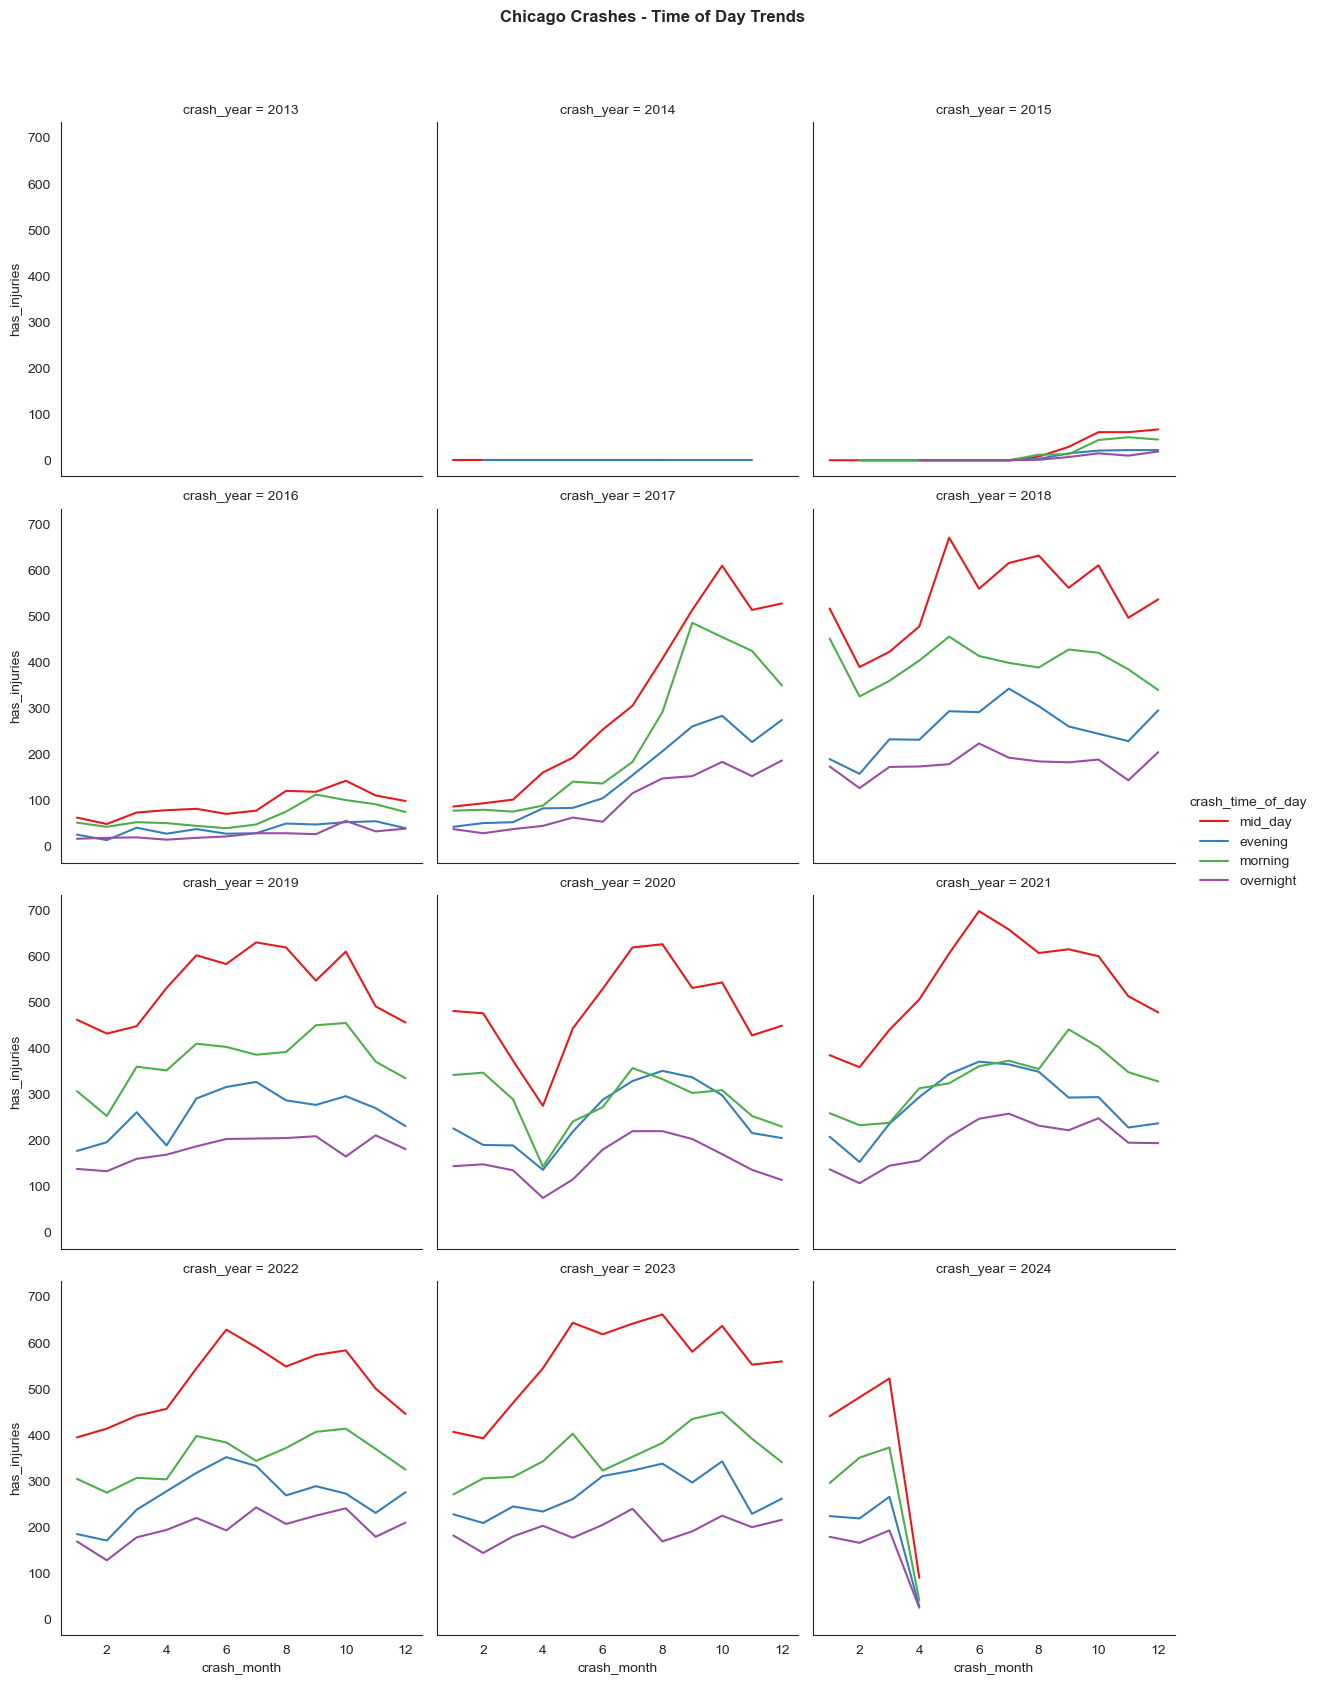

In [40]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'crash_time_of_day',
#    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'has_fatal':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()

g = sns.FacetGrid(crash_agg, col='crash_year', hue='crash_time_of_day', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Time of Day Trends', y=1.05, fontweight='bold')
g.add_legend();

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\1897453666.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({


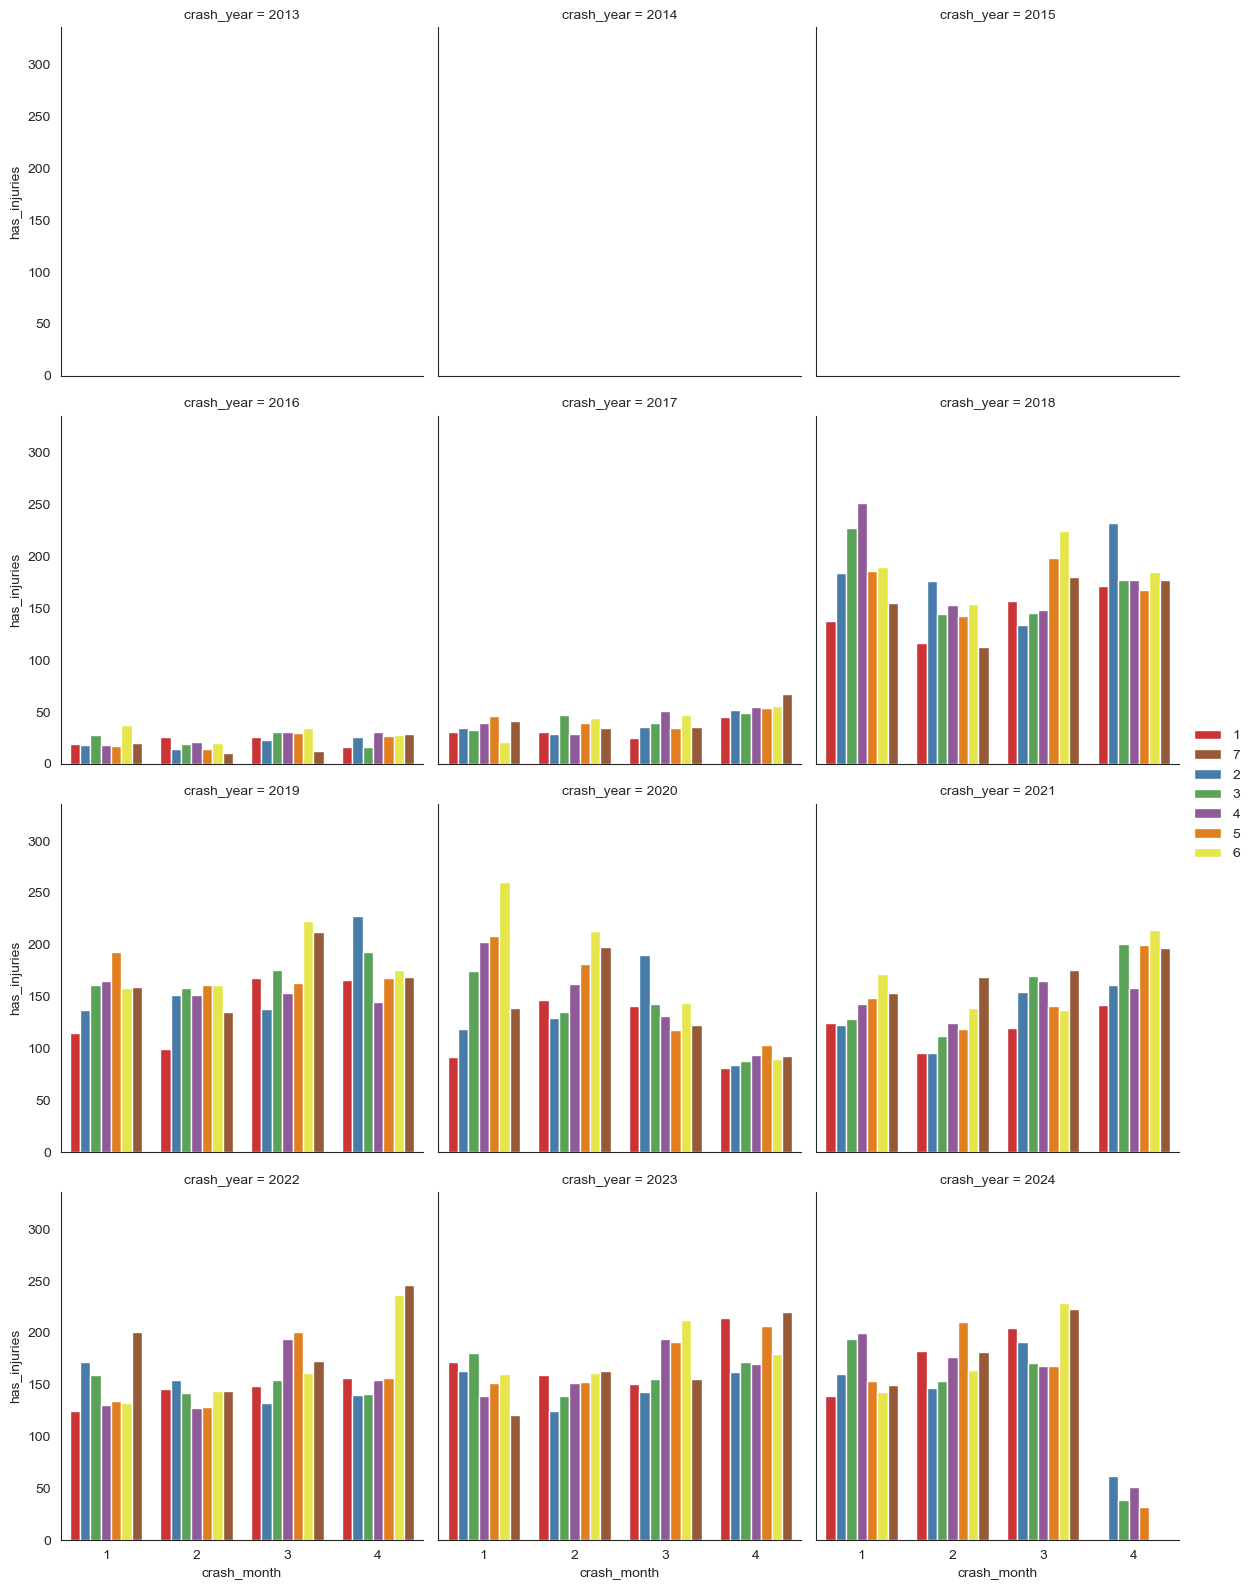

In [41]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
    'crash_day_of_week',
#    'crash_hour',
#    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()

g = sns.FacetGrid(crash_agg, col='crash_year',  col_wrap=3, height=4)
g.map_dataframe(sns.barplot,'crash_month','has_injuries',hue='crash_day_of_week',palette='Set1',)
g.add_legend();

In [42]:
(crash_df.weather_condition == 'OTHER').sum()

2582

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3373681821.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3373681821.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

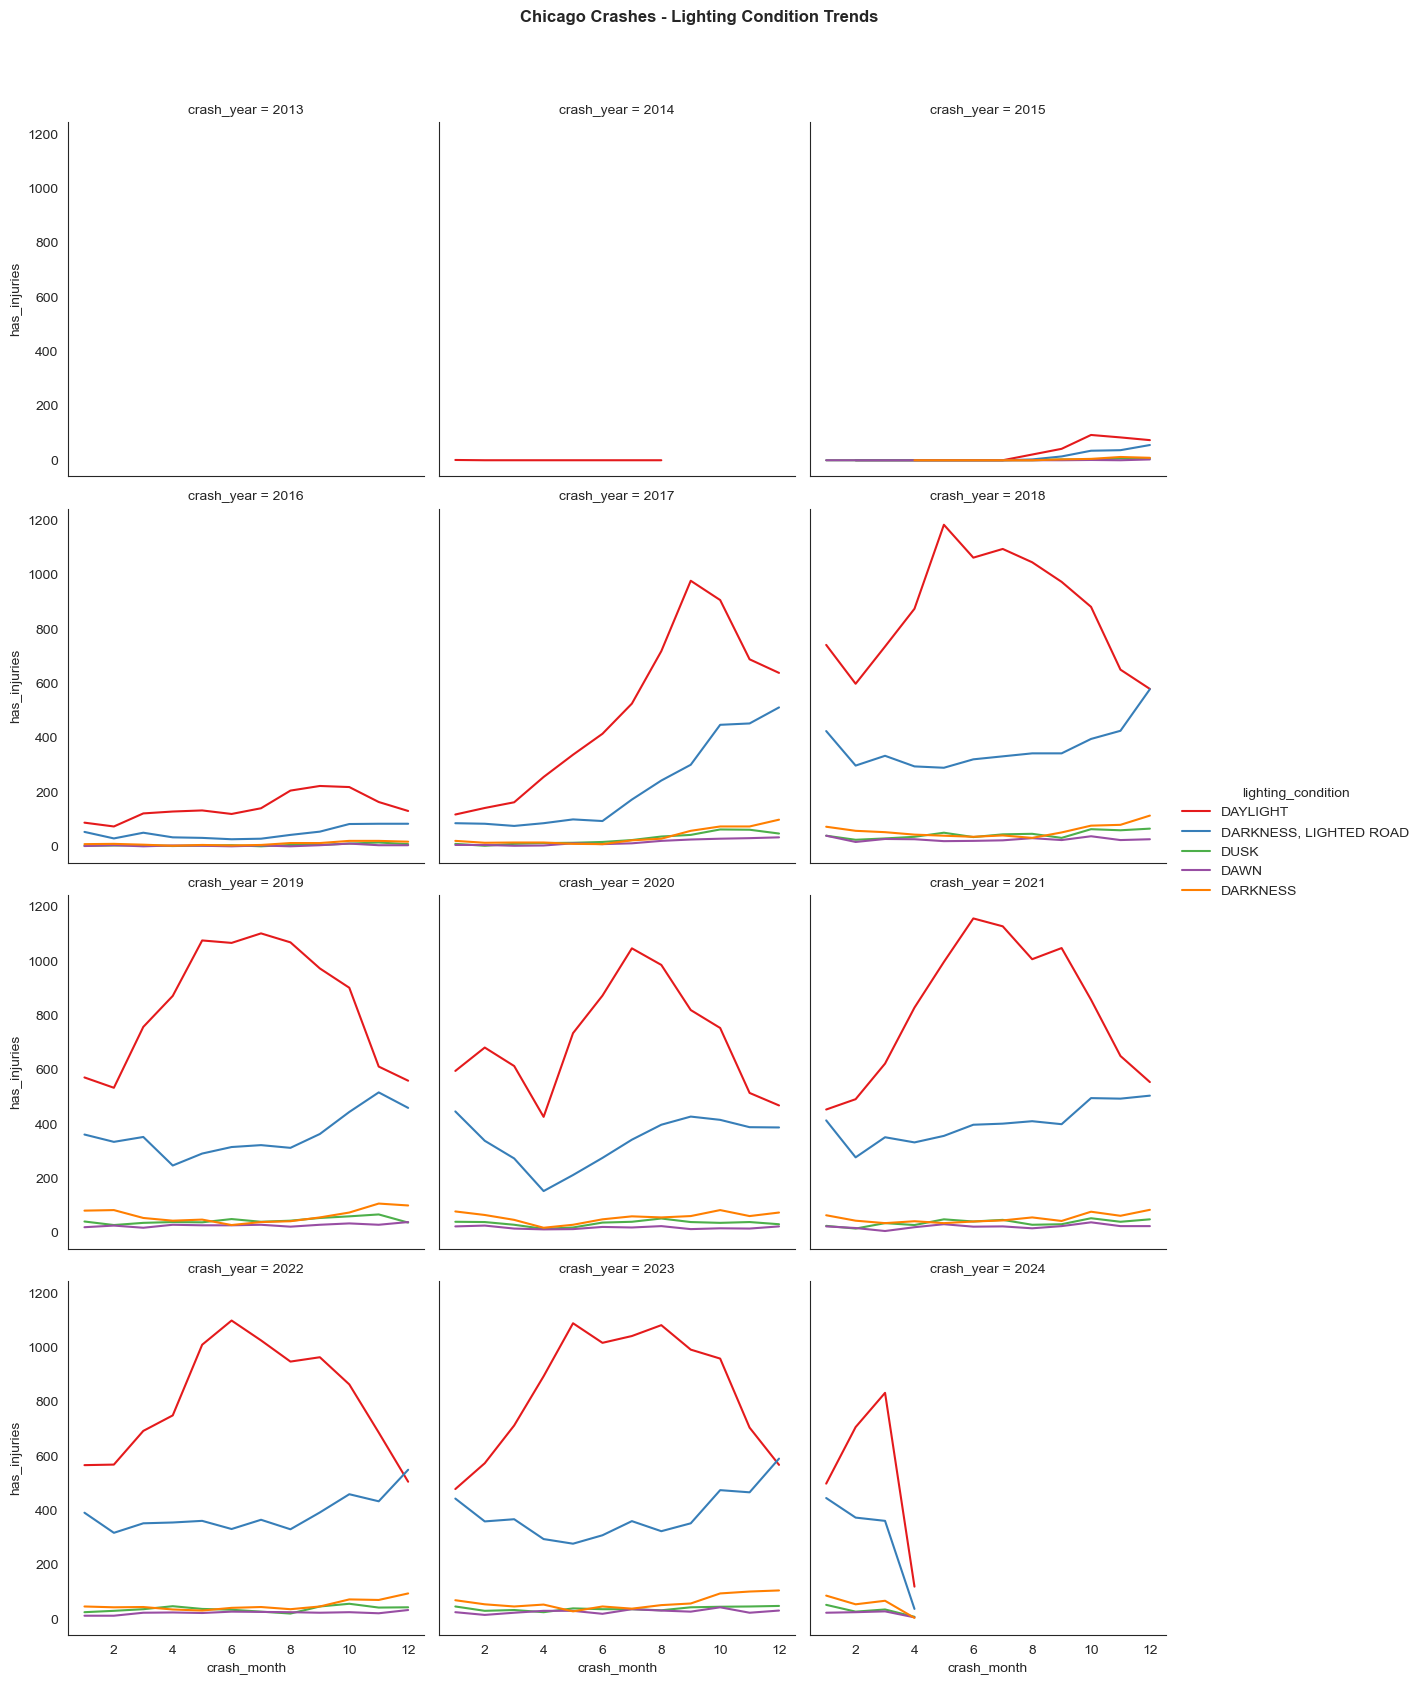

In [43]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'lighting_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index().query('lighting_condition not in ["UNKNOWN"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='lighting_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Lighting Condition Trends', y=1.05, fontweight='bold')
g.add_legend();

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\288484531.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\288484531.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

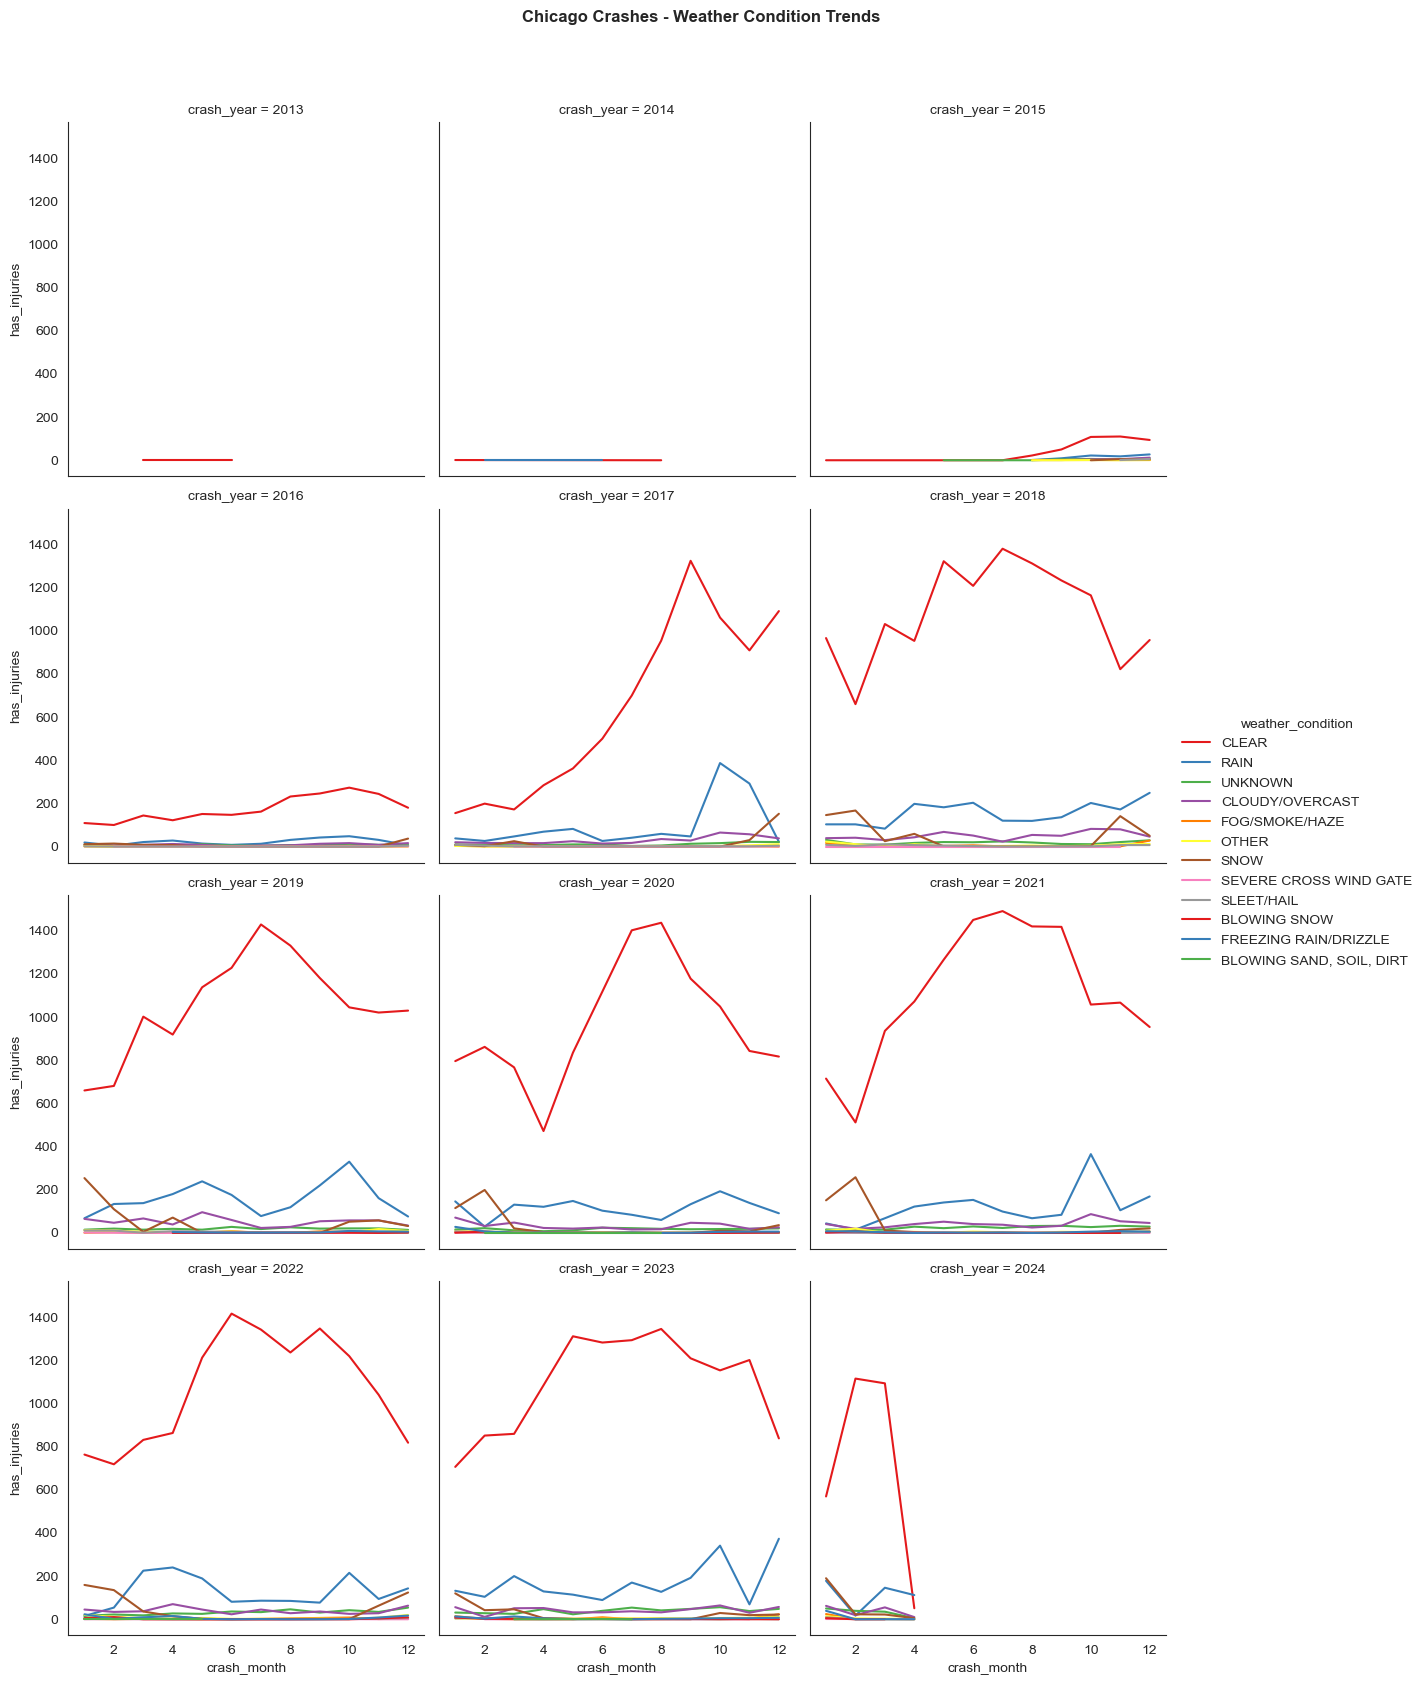

In [44]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index()#.query('weather_condition not in ["CLEAR"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Weather Condition Trends', y=1.05, fontweight='bold')
g.add_legend();

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\969799078.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\969799078.py:7: FutureWarning: The provided callable <function sum at 0x000001F700D9A0E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ]).agg({
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

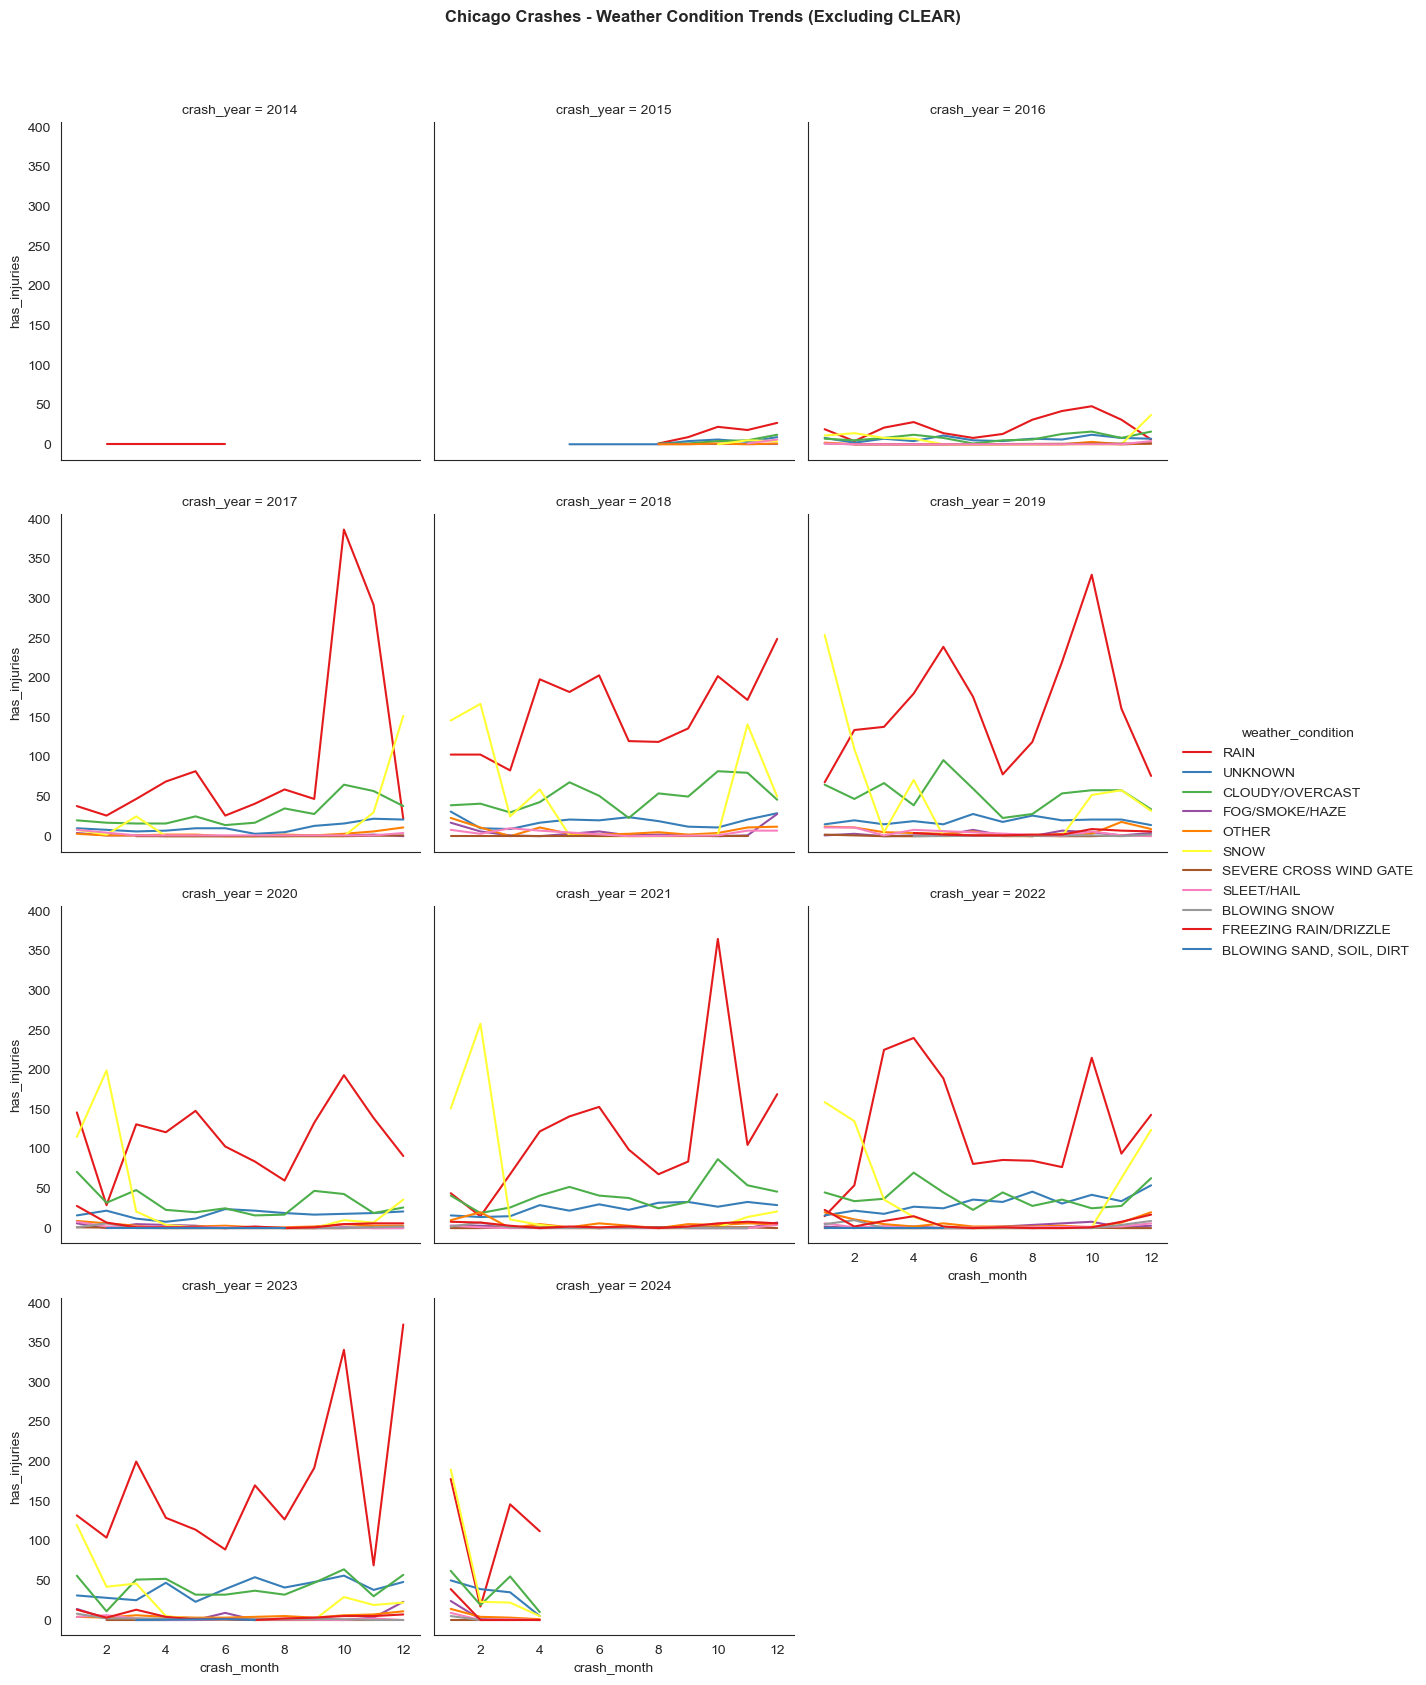

In [45]:
crash_agg = crash_df.groupby([
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'weather_condition'
]).agg({
    'has_injuries':np.sum,
    'injuries_total':np.sum,
    'injuries_fatal':np.sum
}
).fillna(0).reset_index().query('weather_condition not in ["CLEAR"]')

g = sns.FacetGrid(crash_agg, col='crash_year', hue='weather_condition', palette='Set1', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot,'crash_month', 'has_injuries')
g.fig.suptitle('Chicago Crashes - Weather Condition Trends (Excluding CLEAR)', y=1.05, fontweight='bold')
g.add_legend();

In [46]:
from sklearn.preprocessing import StandardScaler
crash_sdf = crash_df.copy()
col_names = ['injuries_total', 'injuries_fatal']
features = crash_sdf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
crash_sdf[col_names] = features
display(crash_sdf.head(5))

Unnamed: 0           crash_date  crash_year  crash_month  crash_day_of_week  crash_hour crash_time_of_day  \
0           0  2023-07-29 14:45:00        2023            7                  7          14           mid_day   
1           1  2023-08-18 17:58:00        2023            8                  6          17           mid_day   
2           2  2023-07-29 14:30:00        2023            7                  7          14           mid_day   
3           3  2023-07-29 00:50:00        2023            7                  7           0         overnight   
4           4  2023-09-20 12:57:00        2023            9                  4          12           morning   

   latitude  longitude  beat_of_occurrence                  address  street_no street_direction       street_name  \
0     41.85     -87.67                1235       2101 S ASHLAND AVE       2101                S       ASHLAND AVE   
1     41.94     -87.76                1633          3422 N LONG AVE       3422                N          LONG AVE   
2     41.81     -87.59                 222           1320 E 47TH ST       1320                E           47TH ST   
3     41.90     -87.70                1211     999 N CALIFORNIA AVE        999                N    CALIFORNIA AVE   
4     41.74     -87.59                 412  8300 S STONY ISLAND AVE       8300                S  STONY ISLAND AVE   

   posted_speed_limit traffic_control_device      device_condition weather_condition lighting_condition  \
0                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1                  30            NO CONTROLS           NO CONTROLS             CLEAR           DAYLIGHT   
2                  10            NO CONTROLS           NO CONTROLS           UNKNOWN            UNKNOWN   
3                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR           DARKNESS   
4                  15            NO CONTROLS           NO CONTROLS             CLEAR           DAYLIGHT   

                   trafficway_type           alignment roadway_surface_cond road_defect              first_crash_type  \
0  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY  NO DEFECTS          PARKED MOTOR VEHICLE   
1                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY  NO DEFECTS                  PEDALCYCLIST   
2                      PARKING LOT  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN                         ANGLE   
3                      NOT DIVIDED  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  SIDESWIPE OPPOSITE DIRECTION   
4                      PARKING LOT  STRAIGHT AND LEVEL                  DRY  NO DEFECTS                  REAR TO SIDE   

                  prim_contributory_cause                             sec_contributory_cause  num_units  has_injuries  \
0  FAILING TO REDUCE SPEED TO AVOID CRASH  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...          4             0   
1  FAILING TO REDUCE SPEED TO AVOID CRASH                                UNABLE TO DETERMINE          2             1   
2                     UNABLE TO DETERMINE                                     NOT APPLICABLE          2             0   
3                     UNABLE TO DETERMINE                                     NOT APPLICABLE          2             0   
4                        IMPROPER BACKING                                     NOT APPLICABLE          2             0   

   has_fatal                        crash_type         damage  injuries_total  injuries_fatal  
0          0            NO INJURY / DRIVE AWAY    OVER $1,500           -0.34           -0.03  
1          0  INJURY AND / OR TOW DUE TO CRASH  $501 - $1,500            1.43           -0.03  
2          0            NO INJURY / DRIVE AWAY  $501 - $1,500           -0.34           -0.03  
3          0            NO INJURY / DRIVE AWAY    OVER $1,500           -0.34           -0.03  
4          0            NO INJURY / DRIVE AWAY    

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\1718020676.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\1718020676.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\1718020676.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be 

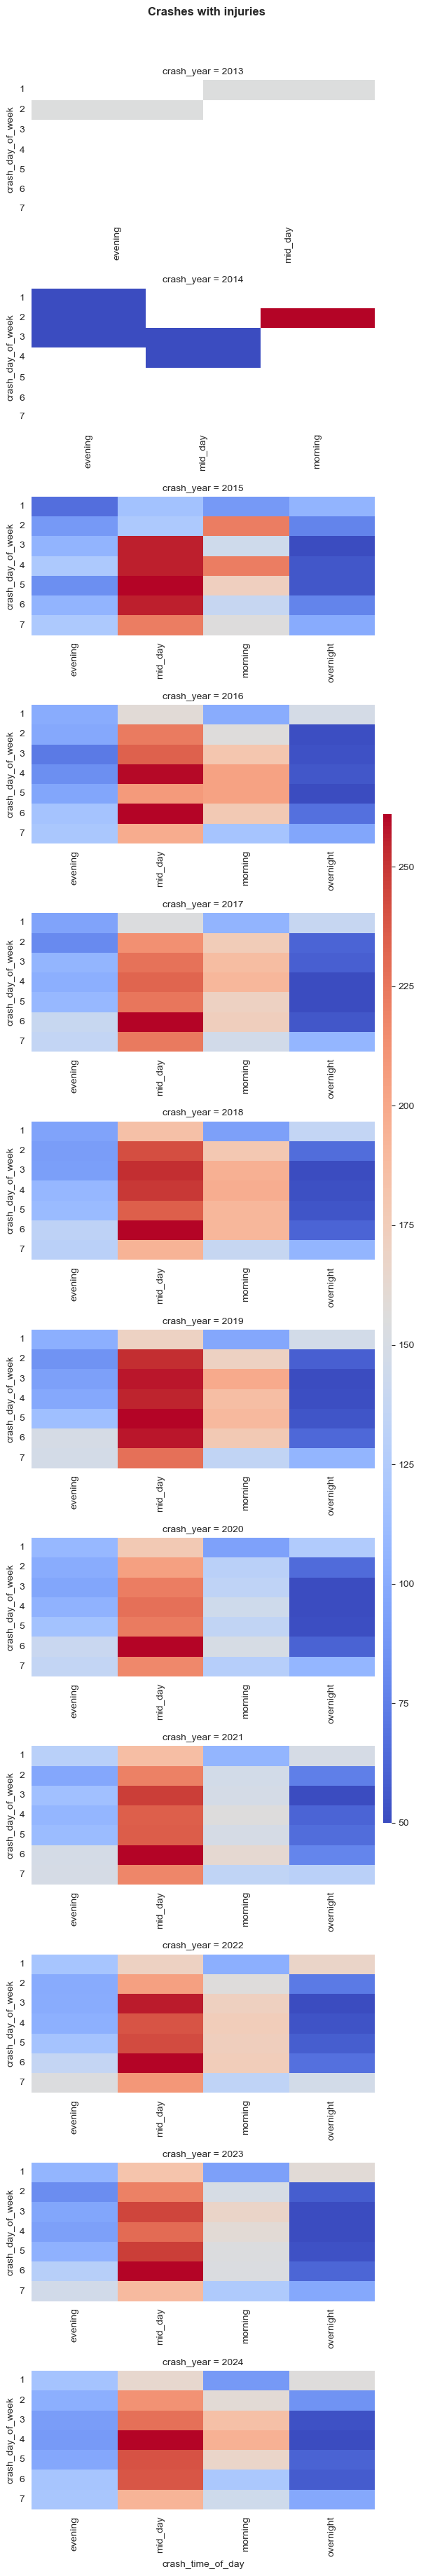

In [47]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')

    # Dynamically setting y-tick labels from the data
    y_labels = d.index.tolist()  # assuming the pivot table index has the correct order
    ax.set_yticklabels(y_labels, rotation=0)
    # Optional: if you want to set x-tick labels dynamically as well
    x_labels = d.columns.tolist()
    ax.set_xticklabels(x_labels, rotation=90)


fg = sns.FacetGrid(crash_df, row='crash_year', aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4],)  # <-- Create a colorbar axes
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'crash_day_of_week', 'has_injuries', square = False,
                 cbar_ax=cbar_ax,
                 #vmin=0, vmax=1, center=.5
                )
fg.fig.subplots_adjust(right=.9)
fg.fig.suptitle('Crashes with injuries', y=1.02, fontweight='bold')
plt.show()

# Fiddling with Weekends

In [48]:
print(crash_df['crash_date'])

0         2023-07-29 14:45:00
1         2023-08-18 17:58:00
2         2023-07-29 14:30:00
3         2023-07-29 00:50:00
4         2023-09-20 12:57:00
                 ...         
814104    2020-10-18 00:03:00
814105    2019-10-23 13:32:00
814106    2023-09-13 13:08:00
814107    2019-10-13 01:40:00
814108    2023-05-17 10:20:00
Name: crash_date, Length: 814109, dtype: object


In [49]:
crash_df['crash_date'] = pd.to_datetime(crash_df['crash_date'])

In [50]:
print(crash_df['crash_date'].dtypes)

datetime64[ns]


In [51]:
crash_df.query('crash_day_of_week == 1').crash_date.dt.day_name()[:1]

6    Sunday
Name: crash_date, dtype: object

In [52]:
crash_df.crash_day_of_week.map(lambda x: 'Weekend' if x in [1,7] else 'Weekday')

0         Weekend
1         Weekday
2         Weekend
3         Weekend
4         Weekday
           ...   
814104    Weekend
814105    Weekday
814106    Weekday
814107    Weekend
814108    Weekday
Name: crash_day_of_week, Length: 814109, dtype: object

C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3366207738.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3366207738.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
C:\Users\vanam\AppData\Local\Temp\ipykernel_26924\3366207738.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be 

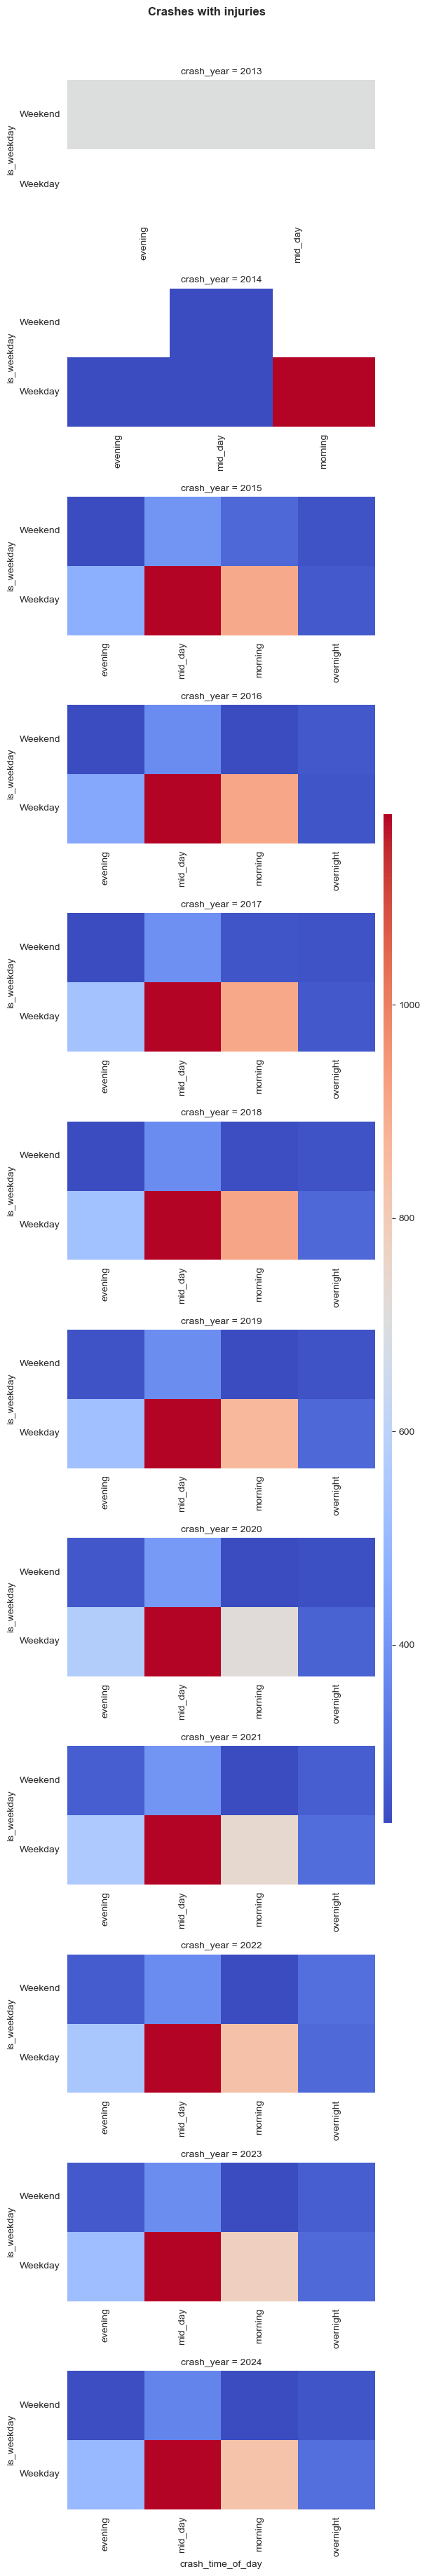

In [53]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc=sum)
    ax = sns.heatmap(d, **kwargs, cmap='coolwarm')

    # Dynamically set y-tick labels based on the data
    y_labels = ['Weekend' if i == 0 else 'Weekday' for i in d.index]
    ax.set_yticklabels(y_labels, rotation=0)
    x_labels = d.columns.tolist()  # Assuming the columns are the 'crash_time_of_day'
    ax.set_xticklabels(x_labels, rotation=90)

crash_df['is_weekday'] = crash_df.crash_day_of_week.map(lambda x: 0 if x in [1, 7] else 1)


fg = sns.FacetGrid(crash_df, row='crash_year',  aspect=2, sharex=False)
cbar_ax = fg.fig.add_axes([.92, .3, .02, .4],)  # <-- Create a colorbar axes
fg.map_dataframe(draw_heatmap, 'crash_time_of_day', 'is_weekday', 'has_injuries', square = False,
                 cbar_ax=cbar_ax,
                 #vmin=0, vmax=1, center=.5
                )
fg.fig.subplots_adjust(right=.9)
fg.fig.suptitle('Crashes with injuries', y=1.02, fontweight='bold')
plt.show()

# Plot Map

In [54]:
crash_df.groupby(by=['longitude','latitude']).size().reset_index(name='crashes')

longitude  latitude  crashes
0          -87.94     41.96        1
1          -87.94     41.96        1
2          -87.93     41.96        3
3          -87.93     42.01        1
4          -87.93     41.96        1
...           ...       ...      ...
300528     -87.52     41.70        8
300529     -87.52     41.70        1
300530     -87.52     41.70        1
300531     -87.52     41.70        4
300532     -87.52     41.70       13

[300533 rows x 3 columns]

In [55]:
crash_df_ = crash_df.copy()
#crash_df_['crash_year'] = crash_df_['crash_year'].astype('category')
#crash_df_['longitude'] = crash_df_['longitude'].round(4)
#crash_df_['latitude'] = crash_df_['latitude'].round(4)
crash_df_ = crash_df_.groupby(by=['longitude','latitude','crash_year']).agg(crashes=('has_injuries', 'count'), has_injuries=('has_injuries', 'max'), is_weekday=('is_weekday', 'max')).reset_index().query('crashes > 0')

In [56]:
crash_df_

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
0          -87.94     41.96        2022        1             0           1
1          -87.94     41.96        2021        1             0           1
2          -87.93     41.96        2020        1             0           1
3          -87.93     41.96        2021        2             0           1
4          -87.93     42.01        2021        1             0           1
...           ...       ...         ...      ...           ...         ...
542123     -87.52     41.70        2020        4             0           1
542124     -87.52     41.70        2021        1             0           1
542125     -87.52     41.70        2022        1             0           1
542126     -87.52     41.70        2023        4             1           1
542127     -87.52     41.70        2024        1             0           1

[542128 rows x 6 columns]

In [57]:
crash_df_.query('crashes>5')

longitude  latitude  crash_year  crashes  has_injuries  is_weekday
6          -87.93     41.96        2019        8             1           1
7          -87.93     41.96        2020       15             1           1
8          -87.93     41.96        2021       12             1           1
9          -87.93     41.96        2022       14             1           1
41         -87.91     41.95        2019        8             1           1
...           ...       ...         ...      ...           ...         ...
542021     -87.53     41.70        2020        7             0           1
542069     -87.53     41.70        2018        7             0           1
542070     -87.53     41.70        2019        7             0           1
542072     -87.53     41.70        2021        7             1           1
542073     -87.53     41.70        2022        6             0           1

[12739 rows x 6 columns]

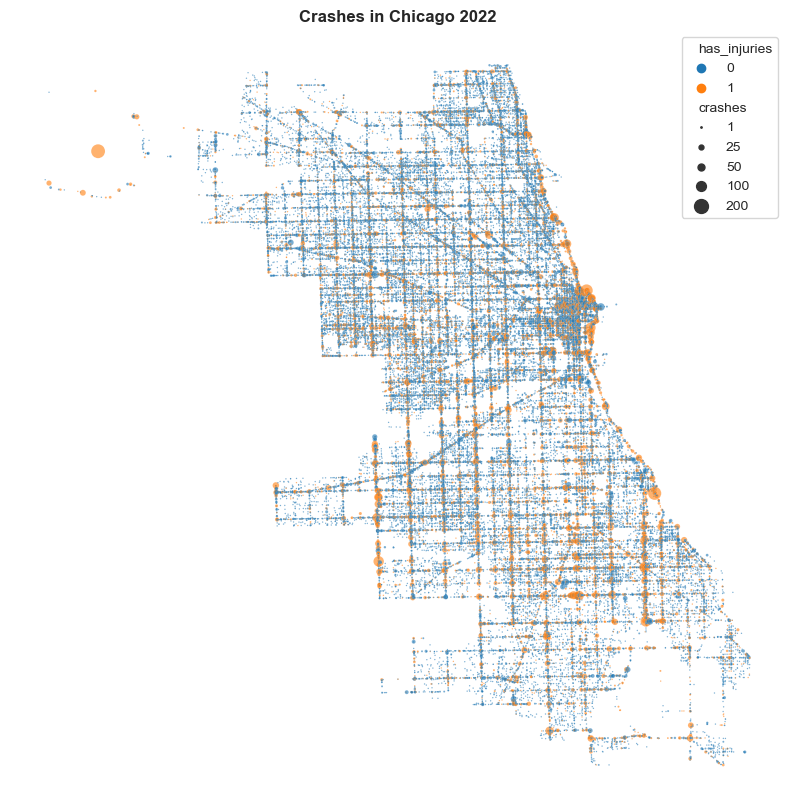

In [58]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2022'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2022',fontweight='bold');

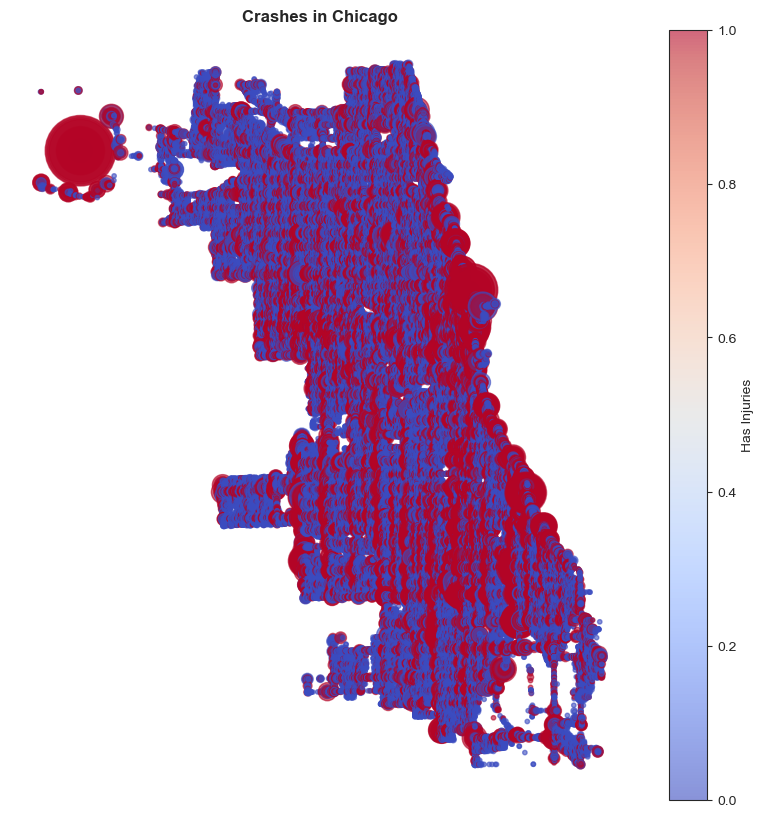

In [59]:
import matplotlib.pyplot as plt

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create a scatter plot
scatter = ax.scatter(crash_df_['longitude'], crash_df_['latitude'],
                     c=crash_df_['has_injuries'],  # Color by 'has_injuries'
                     s=crash_df_['crashes'] * 10,  # Scale sizes by 'crashes' with a scaling factor for visibility
                     cmap='coolwarm', alpha=0.6, norm=plt.Normalize(vmin=0, vmax=1))

# Adding a colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Has Injuries')

# Setting title and removing axes
ax.set_title('Crashes in Chicago', fontweight='bold')
ax.axis('off')

plt.show()


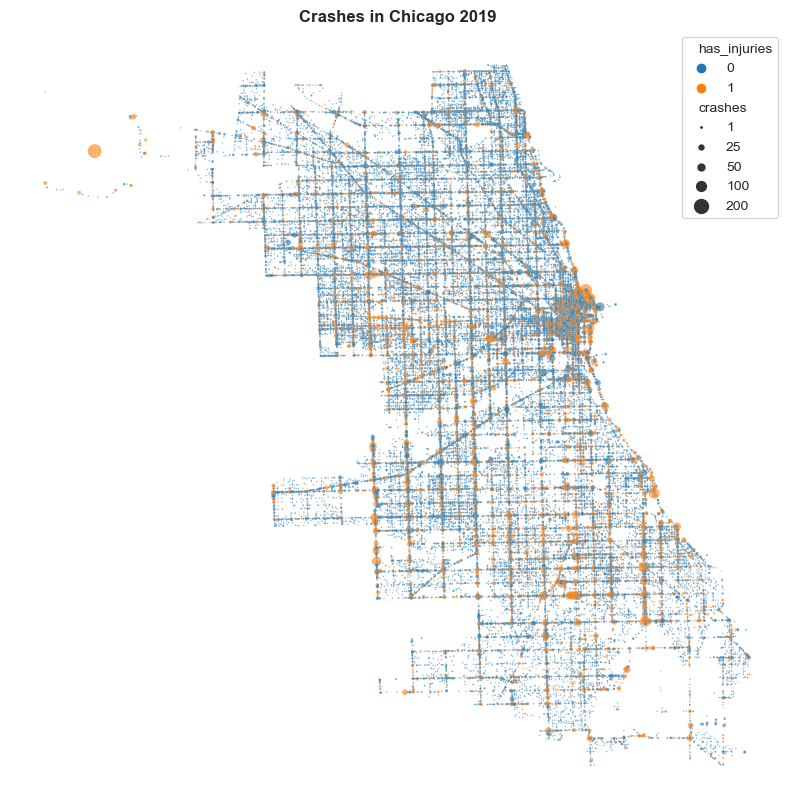

In [60]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2019'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2019',fontweight='bold');

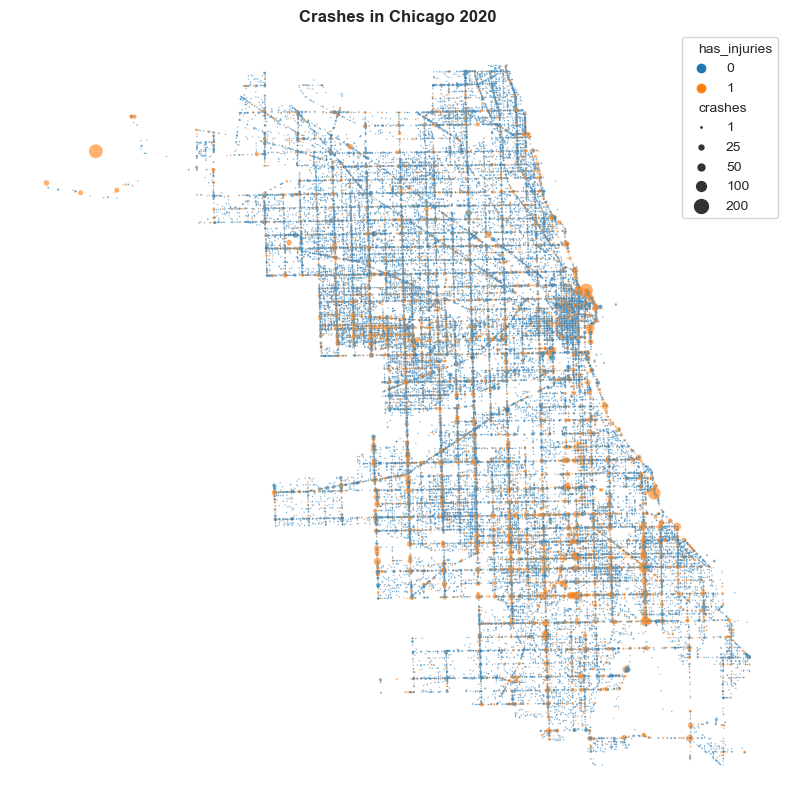

In [61]:
plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=crash_df_.query('crash_year == 2020'), x='longitude',y='latitude',
                hue='has_injuries', sizes={1:1,25:12.5,50:25,100:50,200:100}, size_norm=(1,100), size='crashes', alpha=.6)
fg.set_axis_off()
fg.set_title('Crashes in Chicago 2020',fontweight='bold');

In [62]:
crash_df['crash_date'] = pd.to_datetime(crash_df['crash_date'])

crash_year
2013         2
2014         6
2015      9776
2016     44077
2017     83406
2018    118383
2019    116748
2020     91371
2021    107812
2022    107306
2023    109550
2024     25672
Name: count, dtype: int64
crash_month
1     65479
2     64736
3     67168
4     57852
5     66081
6     67017
7     68399
8     70392
9     71850
10    76217
11    68669
12    70249
Name: count, dtype: int64


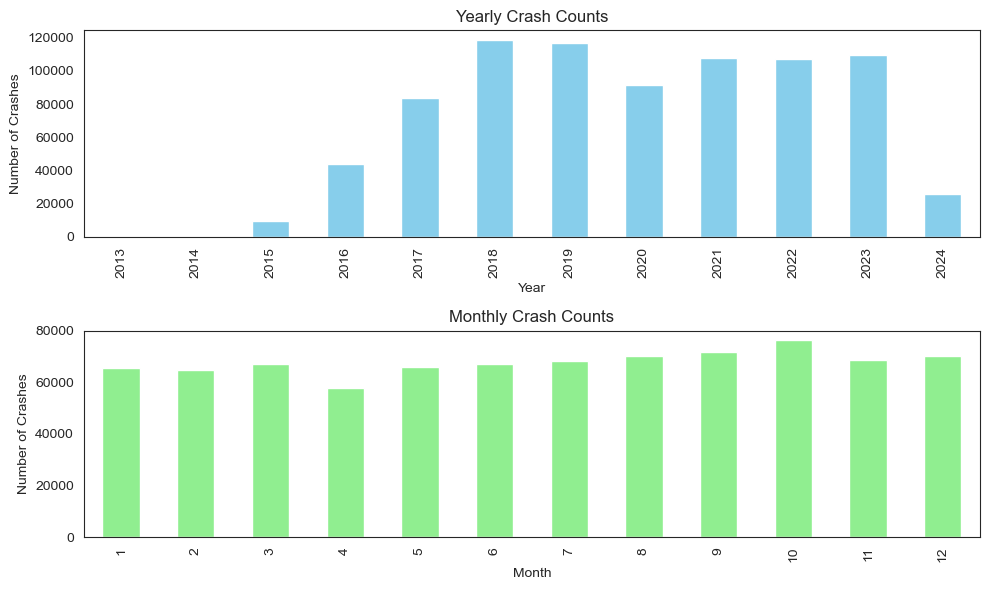

In [96]:
# Question 1: Difference in crashes across years and months
yearly_counts = crash_df['crash_year'].value_counts().sort_index()
monthly_counts = crash_df['crash_month'].value_counts().sort_index()

print(yearly_counts)
print(monthly_counts)
# Plotting yearly and monthly crash counts
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Yearly Crash Counts')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')

plt.subplot(2, 1, 2)
monthly_counts.plot(kind='bar', color='lightgreen')
plt.title('Monthly Crash Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')

plt.tight_layout()
plt.show()


crash_day_of_week
1    100944
2    111907
3    116150
4    115353
5    116877
6    132156
7    120722
Name: count, dtype: int64


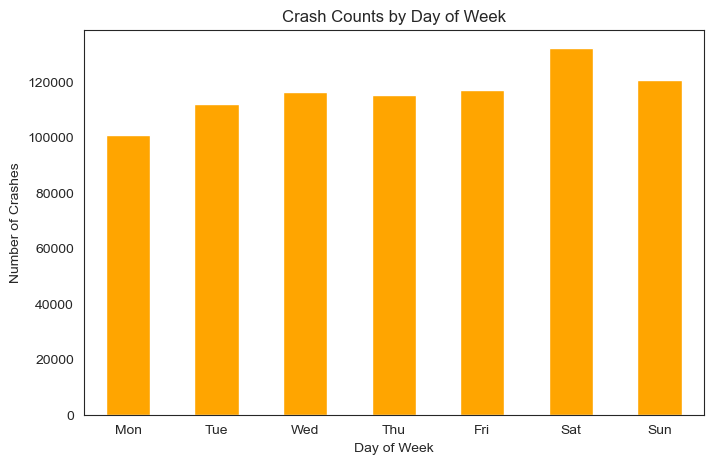

In [94]:
day_of_week_counts = crash_df['crash_day_of_week'].value_counts().sort_index()
print(day_of_week_counts)
# Plotting crash counts by day of week
plt.figure(figsize=(8, 5))
day_of_week_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_counts.plot(kind='bar', color='orange')
plt.title('Crash Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()


crash_hour
0     17607
1     15128
2     12965
3     10572
4      9397
5     11135
6     17580
7     34400
8     43096
9     37371
10    37041
11    41321
12    47776
13    49395
14    54585
15    62971
16    62296
17    60668
18    50009
19    36930
20    29731
21    26576
22    24410
23    21149
Name: count, dtype: int64


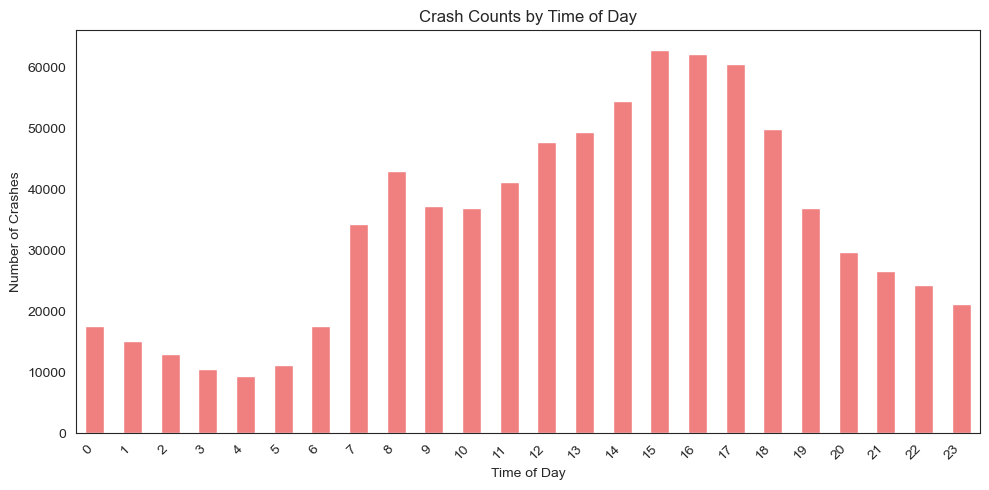

In [93]:
# Question 3: Impact of time of day on crash likelihood
time_of_day_counts = crash_df['crash_hour'].value_counts().sort_index()
print(time_of_day_counts)
# Plotting crash counts by time of day
plt.figure(figsize=(10, 5))
time_of_day_counts.plot(kind='bar', color='lightcoral')
plt.title('Crash Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2013
crash_month
3    1
6    1
Name: count, dtype: int64


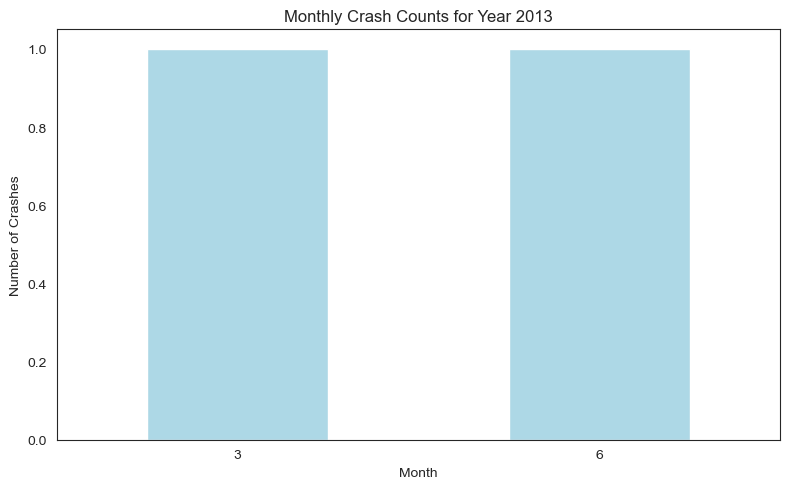

2014
crash_month
1     2
2     1
6     1
8     1
11    1
Name: count, dtype: int64


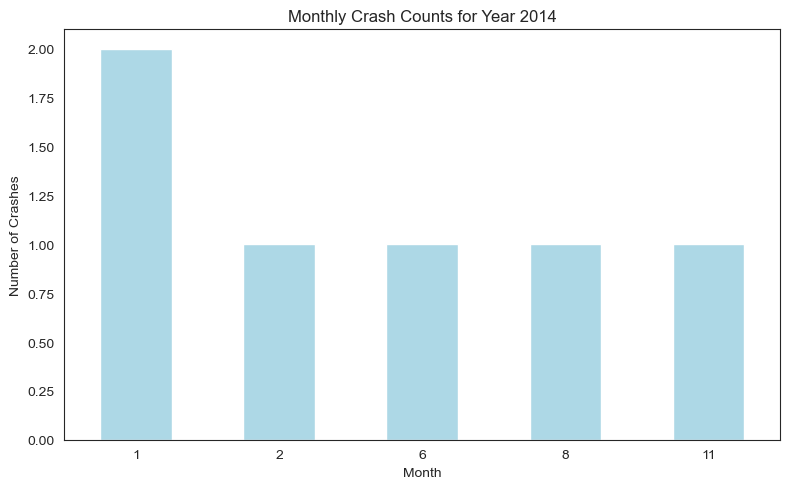

2015
crash_month
1        2
2        2
4        3
5        3
6        3
7       15
8      443
9     1517
10    2799
11    2590
12    2399
Name: count, dtype: int64


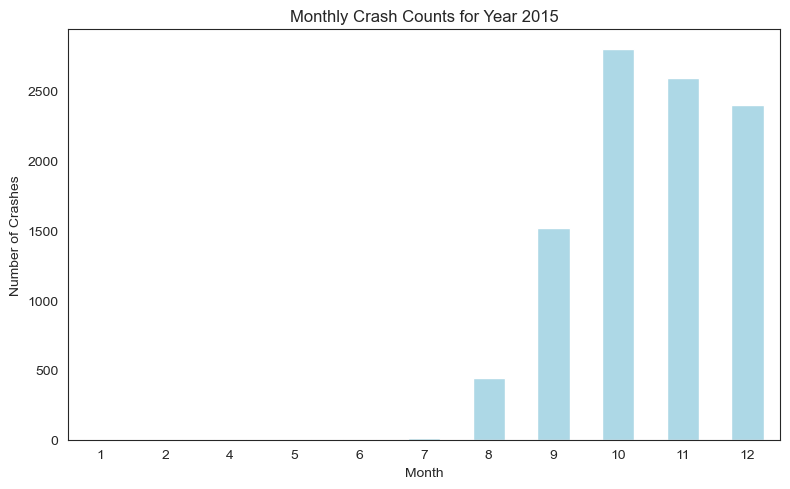

2016
crash_month
1     2750
2     2527
3     2912
4     2892
5     3075
6     2814
7     3291
8     4444
9     4679
10    4972
11    4697
12    5024
Name: count, dtype: int64


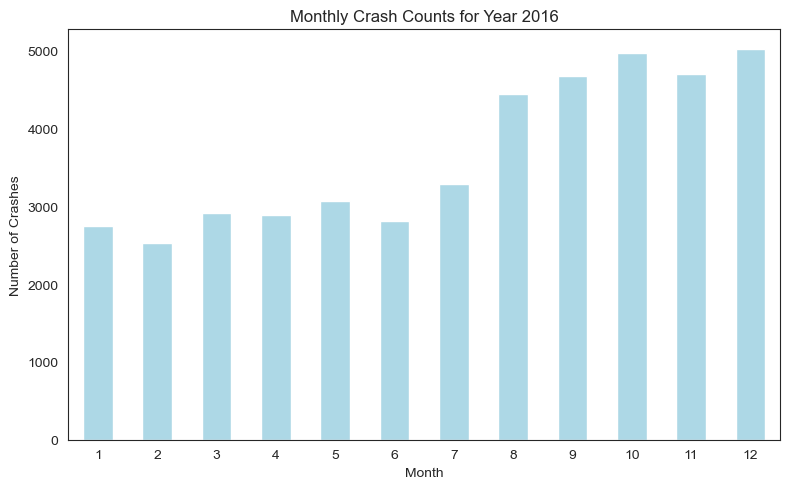

2017
crash_month
1      4335
2      4080
3      5086
4      5001
5      5817
6      6188
7      6732
8      7661
9      9002
10     9981
11     9471
12    10052
Name: count, dtype: int64


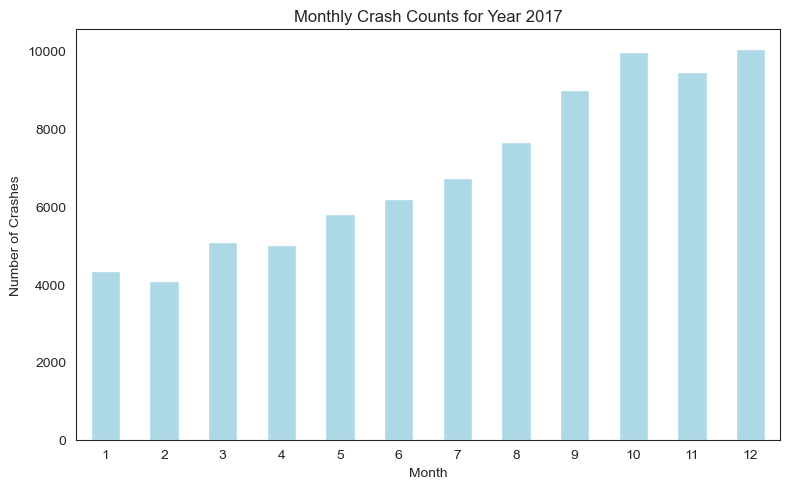

2018
crash_month
1      9489
2      8692
3      9272
4      9606
5     10681
6     10548
7     10331
8     10176
9      9860
10    10343
11     9414
12     9971
Name: count, dtype: int64


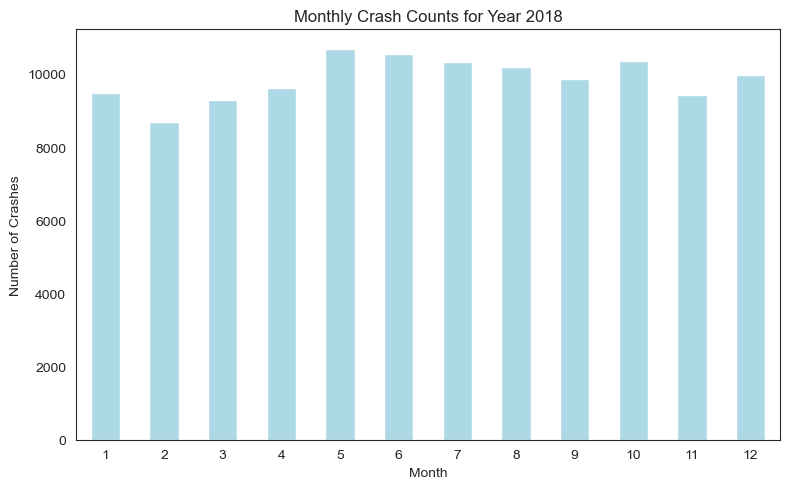

2019
crash_month
1      9076
2      8570
3      9678
4      9381
5     10617
6     10580
7     10567
8      9846
9      9711
10     9833
11     9557
12     9332
Name: count, dtype: int64


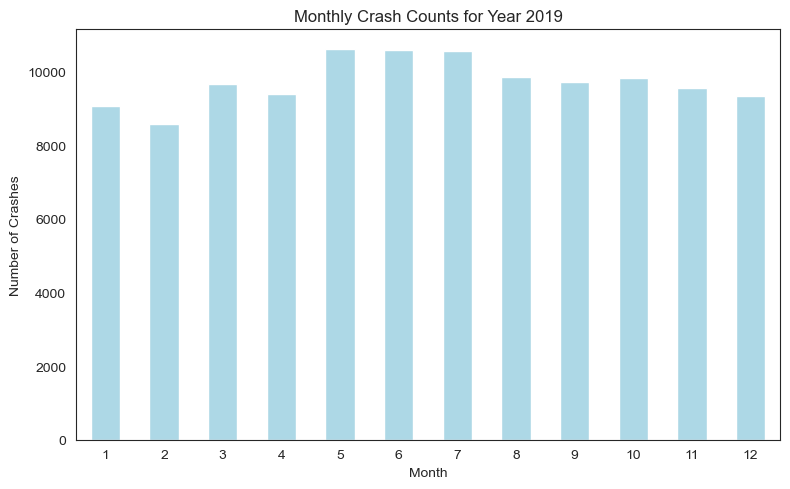

2020
crash_month
1     8579
2     8919
3     6612
4     4397
5     6517
6     7623
7     8977
8     9109
9     8237
10    8304
11    6909
12    7188
Name: count, dtype: int64


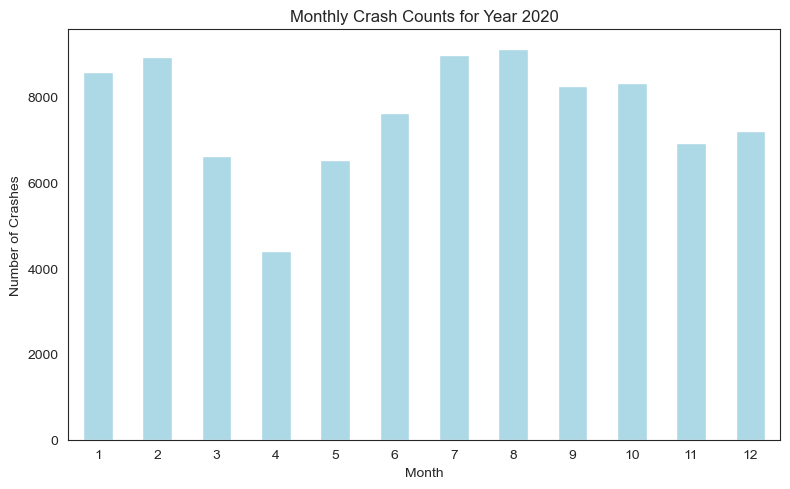

2021
crash_month
1      7001
2      8337
3      7611
4      8095
5      9588
6     10254
7      9907
8      9888
9      9829
10    10197
11     8677
12     8428
Name: count, dtype: int64


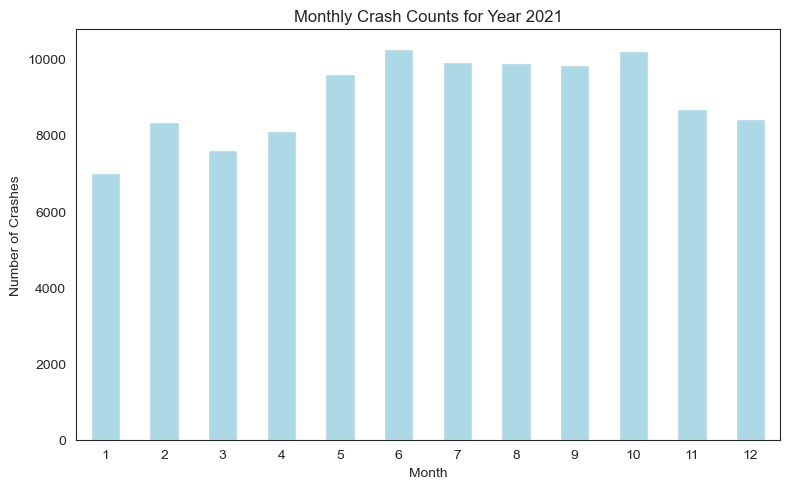

2022
crash_month
1     8100
2     7876
3     8465
4     8448
5     9751
6     9514
7     9158
8     9146
9     9500
10    9808
11    8699
12    8841
Name: count, dtype: int64


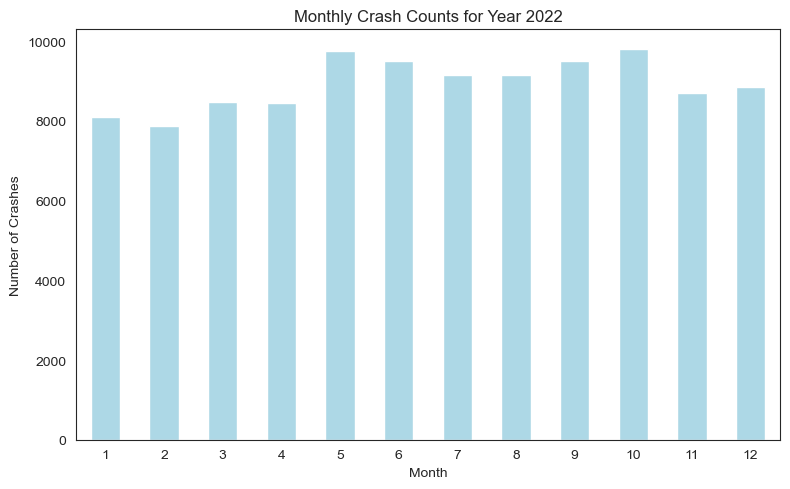

2023
crash_month
1      8025
2      8021
3      8793
4      8926
5     10032
6      9491
7      9421
8      9678
9      9515
10     9980
11     8654
12     9014
Name: count, dtype: int64


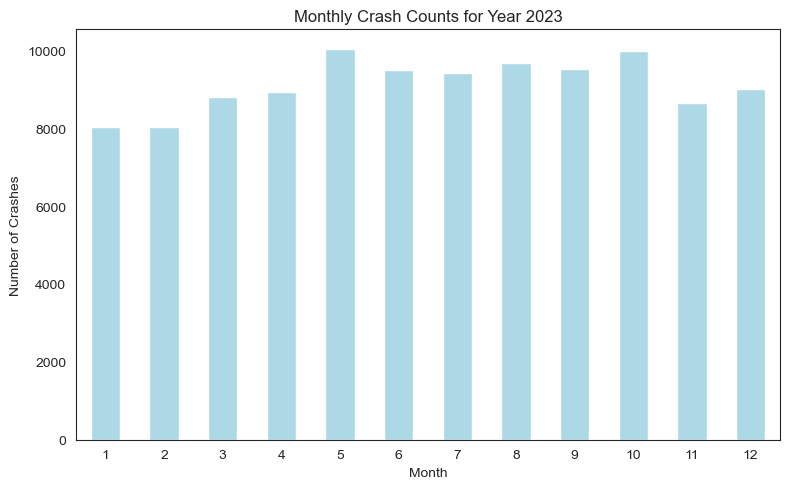

2024
crash_month
1    8120
2    7711
3    8738
4    1103
Name: count, dtype: int64


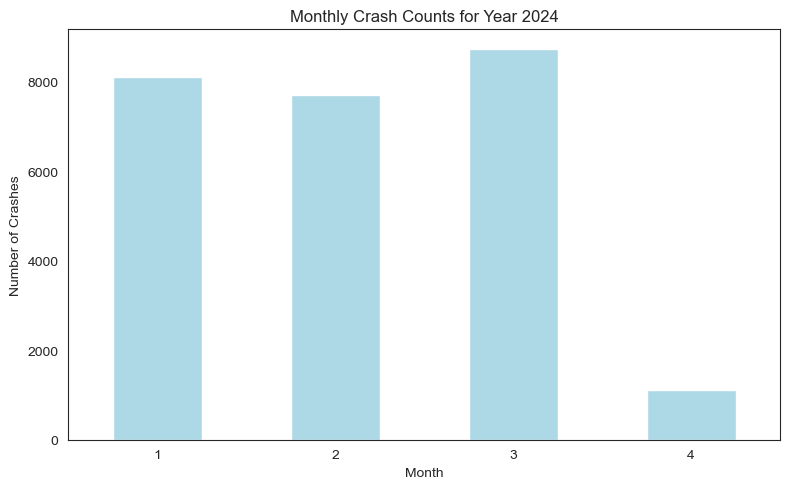

In [92]:
yearly_counts = crash_df['crash_year'].value_counts().sort_index()

# Get unique years from the data
unique_years = yearly_counts.index.tolist()

# Plotting monthly crash counts for each year
for year in unique_years:
    monthly_counts = crash_df[crash_df['crash_year'] == year]['crash_month'].value_counts().sort_index()
    print(year)
    print(monthly_counts)
    plt.figure(figsize=(8, 5))
    monthly_counts.plot(kind='bar', color='lightblue')
    plt.title(f'Monthly Crash Counts for Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crashes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [70]:
# Question 1: Specific locations where crashes are more prevalent
location_counts = crash_df['address'].value_counts().head(10)  # Top 10 most frequent addresses

In [71]:
location_counts

address
10000 W OHARE ST           1308
5700 S LAKE SHORE DR        583
7900 S STONY ISLAND AVE     558
9500 S STONY ISLAND AVE     445
1000 N LAKE SHORE DR SB     433
7601 S CICERO AVE           380
1000 N LAKE SHORE DR NB     334
5700 S CICERO AVE           326
1000 N LAKE SHORE DR        310
8700 S STATE ST             295
Name: count, dtype: int64

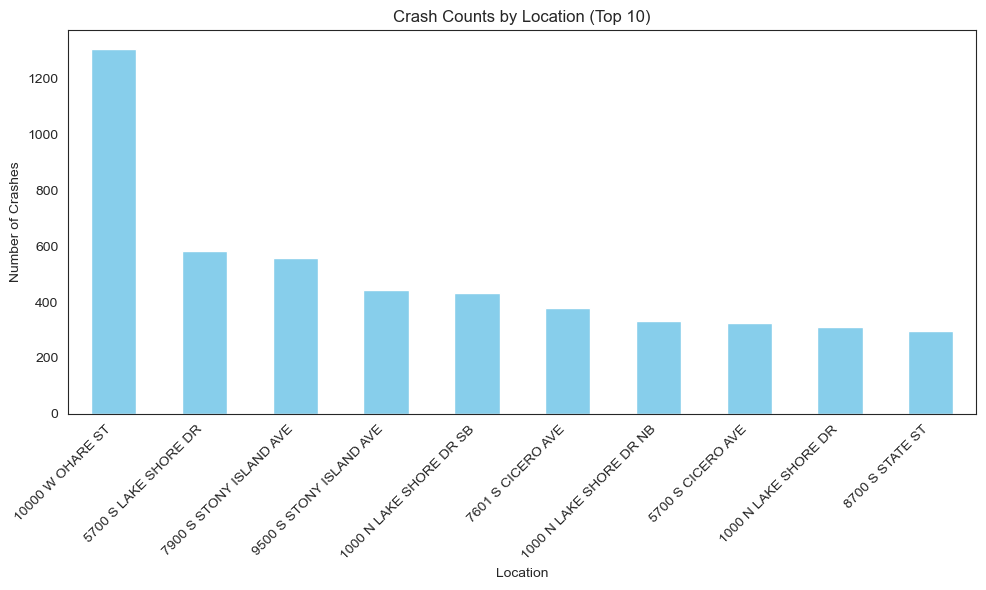

In [72]:
# Plotting crash counts by location
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Crash Counts by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
direction_counts = crash_df['street_direction'].value_counts()
street_type_counts = crash_df['trafficway_type'].value_counts()

In [74]:
direction_counts

street_direction
W    290121
S    272652
N    195826
E     55509
Name: count, dtype: int64

In [75]:
street_type_counts

trafficway_type
NOT DIVIDED                        354812
DIVIDED - W/MEDIAN (NOT RAISED)    130546
ONE-WAY                            102979
PARKING LOT                         55157
FOUR WAY                            51752
DIVIDED - W/MEDIAN BARRIER          46167
OTHER                               21810
ALLEY                               13531
T-INTERSECTION                      10357
UNKNOWN                              9472
CENTER TURN LANE                     5897
DRIVEWAY                             2635
RAMP                                 2428
UNKNOWN INTERSECTION TYPE            2391
Y-INTERSECTION                       1128
FIVE POINT, OR MORE                  1118
TRAFFIC ROUTE                         927
NOT REPORTED                          579
ROUNDABOUT                            260
L-INTERSECTION                        163
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'W'), Text(1, 0, 'S'), Text(2, 0, 'N'), Text(3, 0, 'E')])

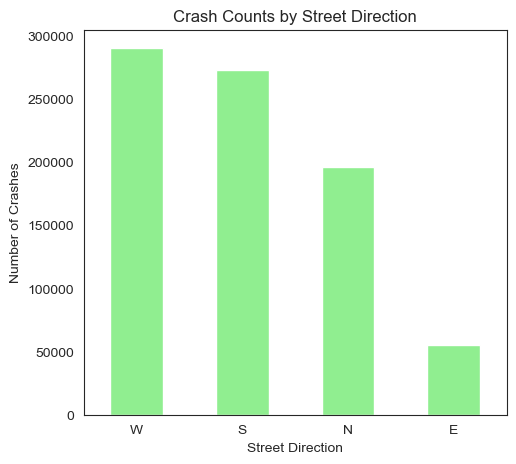

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
direction_counts.plot(kind='bar', color='lightgreen')
plt.title('Crash Counts by Street Direction')
plt.xlabel('Street Direction')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 [Text(0, 0, 'NOT DIVIDED'),
  Text(1, 0, 'DIVIDED - W/MEDIAN (NOT RAISED)'),
  Text(2, 0, 'ONE-WAY'),
  Text(3, 0, 'PARKING LOT'),
  Text(4, 0, 'FOUR WAY'),
  Text(5, 0, 'DIVIDED - W/MEDIAN BARRIER'),
  Text(6, 0, 'OTHER'),
  Text(7, 0, 'ALLEY'),
  Text(8, 0, 'T-INTERSECTION'),
  Text(9, 0, 'UNKNOWN'),
  Text(10, 0, 'CENTER TURN LANE'),
  Text(11, 0, 'DRIVEWAY'),
  Text(12, 0, 'RAMP'),
  Text(13, 0, 'UNKNOWN INTERSECTION TYPE'),
  Text(14, 0, 'Y-INTERSECTION'),
  Text(15, 0, 'FIVE POINT, OR MORE'),
  Text(16, 0, 'TRAFFIC ROUTE'),
  Text(17, 0, 'NOT REPORTED'),
  Text(18, 0, 'ROUNDABOUT'),
  Text(19, 0, 'L-INTERSECTION')])

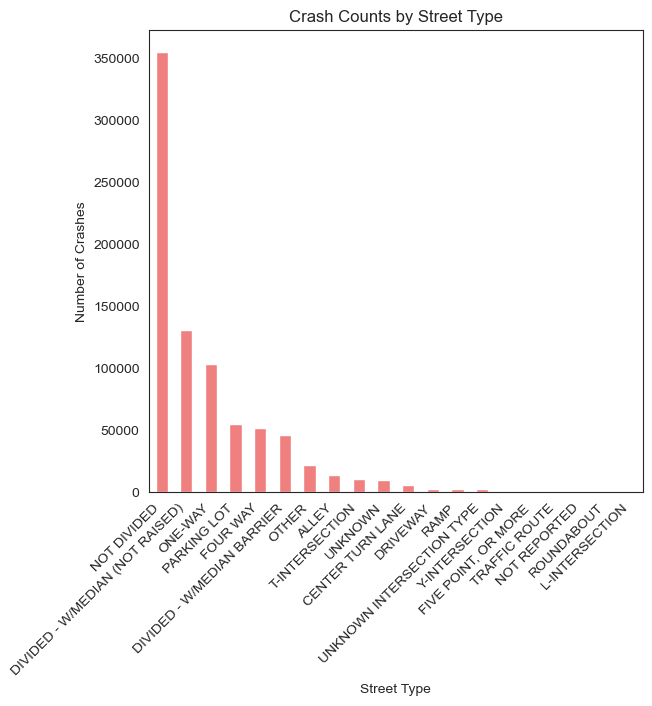

In [78]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
street_type_counts.plot(kind='bar', color='lightcoral')
plt.title('Crash Counts by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')

In [79]:
surface_cond_counts = crash_df['roadway_surface_cond'].value_counts()
road_defect_counts = crash_df['road_defect'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DRY'),
  Text(1, 0, 'WET'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'SNOW OR SLUSH'),
  Text(4, 0, 'ICE'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'SAND, MUD, DIRT')])

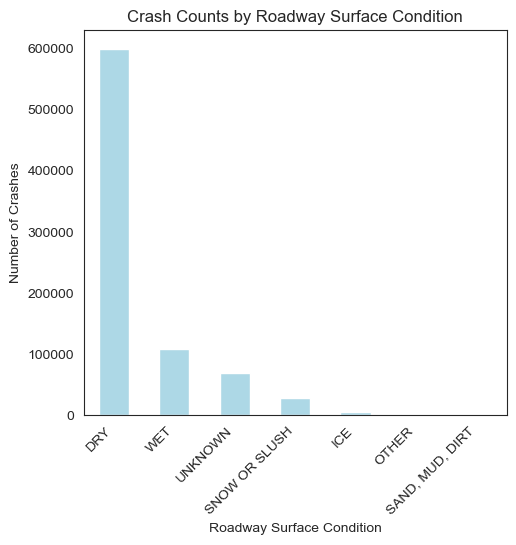

In [80]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
surface_cond_counts.plot(kind='bar', color='lightblue')
plt.title('Crash Counts by Roadway Surface Condition')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')

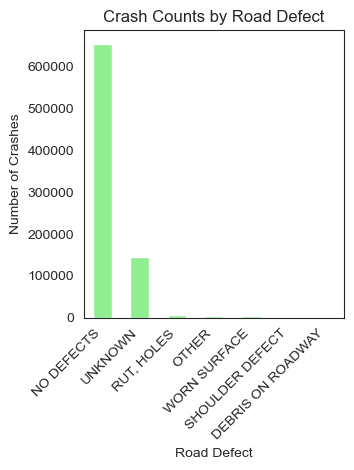

In [82]:
plt.subplot(1, 2, 2)
road_defect_counts.plot(kind='bar', color='lightgreen')
plt.title('Crash Counts by Road Defect')
plt.xlabel('Road Defect')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

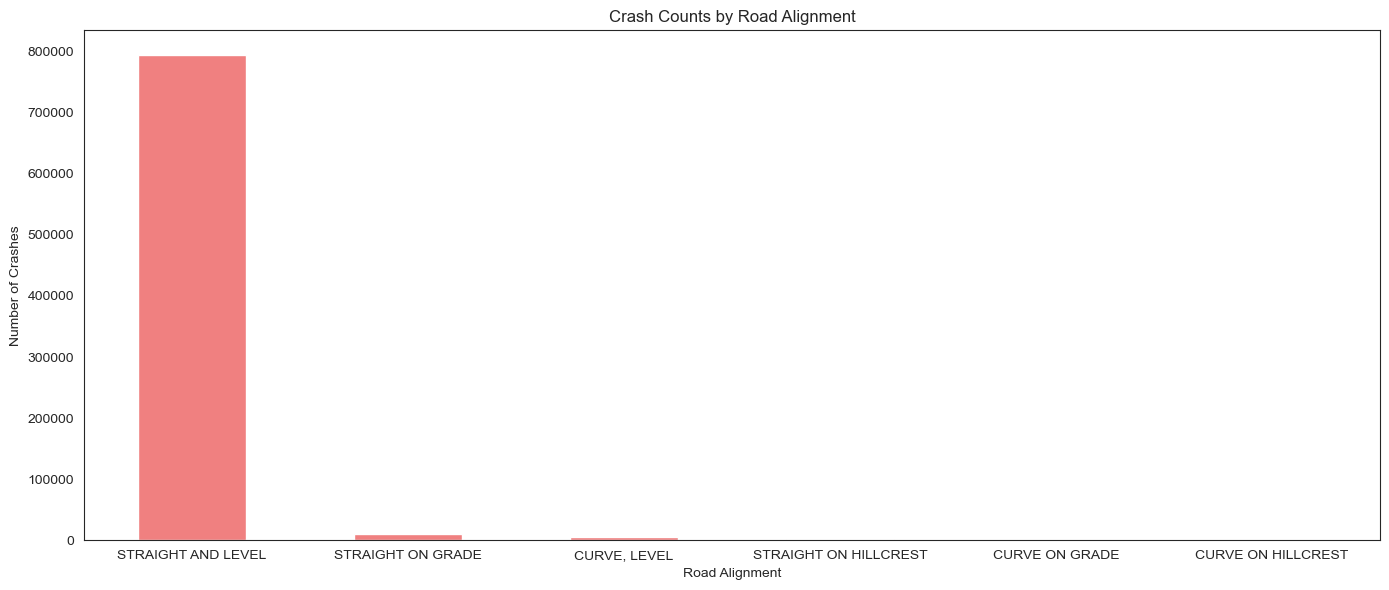

In [84]:
# Question 2: Impact of road alignment on crash rates
alignment_counts = crash_df['alignment'].value_counts()

# Plotting crash counts by road alignment
plt.figure(figsize=(14, 6))
alignment_counts.plot(kind='bar', color='lightcoral')
plt.title('Crash Counts by Road Alignment')
plt.xlabel('Road Alignment')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [85]:
injury_causes = crash_df[crash_df['has_injuries'] == 1]['prim_contributory_cause'].value_counts().head(10)
fatal_causes = crash_df[crash_df['has_fatal'] == 1]['prim_contributory_cause'].value_counts().head(10)

In [86]:
combined_causes = injury_causes.add(fatal_causes, fill_value=0).sort_values(ascending=False).head(10)

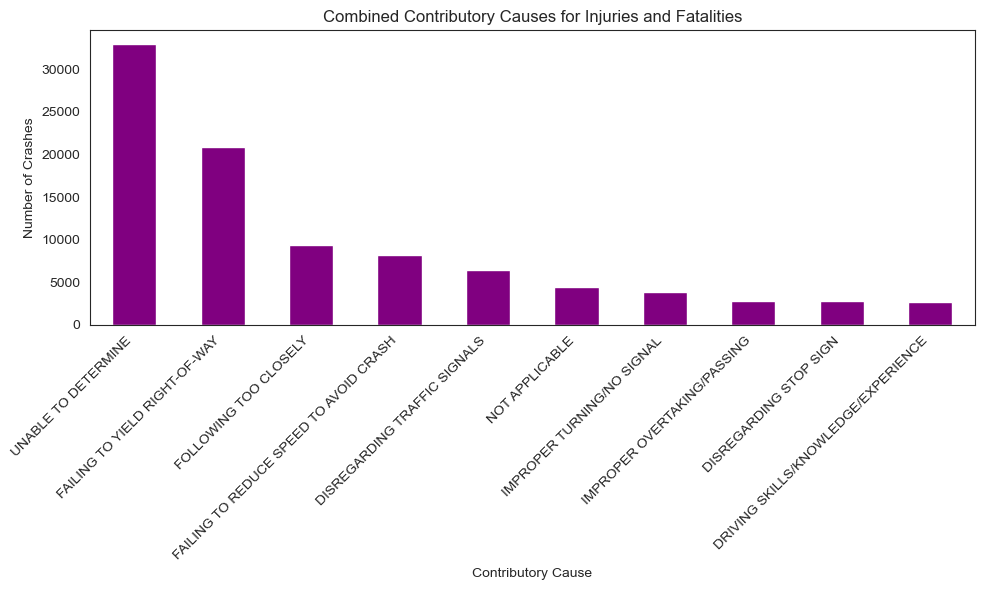

In [87]:
plt.figure(figsize=(10, 6))
combined_causes.plot(kind='bar', color='purple')
plt.title('Combined Contributory Causes for Injuries and Fatalities')
plt.xlabel('Contributory Cause')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [97]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814109 entries, 0 to 814108
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               814109 non-null  int64         
 1   crash_date               814109 non-null  datetime64[ns]
 2   crash_year               814109 non-null  int64         
 3   crash_month              814109 non-null  int64         
 4   crash_day_of_week        814109 non-null  int64         
 5   crash_hour               814109 non-null  int64         
 6   crash_time_of_day        814109 non-null  object        
 7   latitude                 814109 non-null  float64       
 8   longitude                814109 non-null  float64       
 9   beat_of_occurrence       814109 non-null  int64         
 10  address                  814109 non-null  object        
 11  street_no                814109 non-null  int64         
 12  street_direction

In [101]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Example ANOVA test for differences in crashes across years
anova_result_year = f_oneway(*[group['Unnamed: 0'] for name, group in crash_df.groupby('crash_year')])

# Example Kruskal-Wallis test for differences in crashes across months
kruskal_result_month = kruskal(*[group['Unnamed: 0'] for name, group in crash_df.groupby('crash_month')])

print("ANOVA Test for Years:")
print("F-statistic:", anova_result_year.statistic)
print("p-value:", anova_result_year.pvalue)


ANOVA Test for Years:
F-statistic: 1535.1812423008762
p-value: 0.0


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for pairwise comparisons of years
tukey_result_year = pairwise_tukeyhsd(endog=crash_df['Unnamed: 0'], groups=crash_df['crash_year'], alpha=0.05)

print("Tukey's HSD Test for Years:")
print(tukey_result_year)


Tukey's HSD Test for Years:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
  2013   2014 152035.6667 0.9997 -468653.0084 772724.3418  False
  2013   2015    91469.98    1.0 -446117.1626 629057.1225  False
  2013   2016  91088.3752    1.0 -446455.9805 628632.7308  False
  2013   2017  90631.7476    1.0 -446906.8576 628170.3528  False
  2013   2018  90223.7448    1.0 -447312.9563 627760.4459  False
  2013   2019  91160.7917    1.0  -446375.973 628697.5563  False
  2013   2020  92030.9617    1.0 -445507.0817 629569.0051  False
  2013   2021  88584.5379    1.0 -448952.6083 626121.6842  False
  2013   2022   90996.748    1.0 -446540.4218 628533.9178  False
  2013   2023  93568.4012    1.0  -443968.666 631105.4684  False
  2013   2024 282567.9034 0.8604 -254985.1951 820121.0019  False
  2014   2015 -60565.6867    1.0 -371005.2463 249873.8728  Fal

In [103]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is in a DataFrame named 'crash_df'

# Create a contingency table for crash types vs. contributory causes
contingency_table = pd.crosstab(crash_df['first_crash_type'], crash_df['prim_contributory_cause'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-square Statistic: 1075594.2334950888
p-value: 0.0
Degrees of Freedom: 663
Expected Frequencies Table:
[[   75.9864     8.6249   118.019    191.3852   107.7565   966.97    1735.0218    29.3683   609.7468   363.2279
     42.3602   476.8799  2974.2763   550.246    162.8903   213.9846   182.5419  3760.7787  9771.6707  8633.2946
     90.7251  3494.3898  3166.3165  4382.8624  2956.699      2.511   4698.1621     9.935   1132.0439    10.9176
    527.7558    43.8887   189.3108   217.369     34.2812    67.4706 34613.8593   420.3268   505.2656  1341.8797]
 [    0.501      0.0569     0.7781     1.2618     0.7104     6.3753    11.4391     0.1936     4.0201     2.3948
      0.2793     3.1441    19.6097     3.6278     1.0739     1.4108     1.2035    24.7951    64.4255    56.92
      0.5982    23.0388    20.8758    28.8966    19.4938     0.0166    30.9754     0.0655     7.4637     0.072
      3.4795     0.2894     1.2481     1.4331     0.226      0.4448   228.2121     2.7713     3.3313     8.8471]

Inferences:
Strong Association: The extremely high Chi-square statistic combined with a p-value of nearly zero strongly suggests that there is a significant association between the type of crash and the primary contributory cause. This implies that certain crash types are likely to occur with specific contributory causes more often than would be expected by chance.
Implications for Traffic Safety: This significant association can be used to tailor traffic safety measures more specifically. For example, if certain contributory causes are found to significantly lead to more severe types of crashes, targeted interventions can be designed to address these causes.
Data-Driven Decisions: The findings can guide policymakers, urban planners, and traffic safety officials in making informed decisions to implement safety measures that specifically address the most common combinations of crash types and contributory causes, potentially reducing overall crash rates and improving road safety.
